# CMRM Homework Assignment No. 1
## _Filippo Longhi, Carmen Franci_

## 1     Description
The main topic of this homework is electrocardiogram (ECG) classification based on rhythmic features. The goal is to implement an algorithm that is able to classify ECG waveforms into five classes of Arrhythmia by taking into account only rhythmic features. In order to solve such a task, you will have to extract a precise feature vector and train a classifier on the MIT-BIH dataset. Use the Jupyter Notebook named Homework1.ipynb to implement the code, and explain in a report, step by step, what you have implemented.

### 1.1 Question 1
When we deal with machine learning/deep learning algorithms, the first action is to load, analyze, and preprocess the dataset. Typically, such models are built within python scripts, and datasets are down-loaded locally. Often, datasets are organized in .csv files freeing us from the burden of downloading GBs of .wav files. For our ECG classification process, we will consider the MIT-BIH dataset, which you can find in the folder dataset. In particular:

1. Add to your conda environment pandas by running pip install pandas.
2. Add to your conda environment sklearn by running pip install sklearn (or you can also try with pip install scikit-learn).

In [67]:
import os
import numpy as np 
import pandas as pd # pip install pandas
import scipy
import matplotlib.pyplot as plt
import librosa
import sklearn # pip install sklearn
from tqdm import tqdm
import joblib
from sklearn.metrics import accuracy_score, classification_report
import random

3. Load the train dataset mitbih train.csv using the read csv method of pandas and store it into a DataFrame named df. You find further information online.
4. Load the test dataset mitbih test.csv using the read csv method of pandas and store it into a DataFrame named df2.
5. Analyze the DataFrame exploiting the methods of pandas. You can also gather information from the internet. What is the dataset for? How many items are present? Which is their data shape? How many classes? Write everything in your report.
6. Define a dictionary named label names associating the keys [0, 1, 2, 3, 4] to the values (la-bels) ['N', 'S', 'V', 'F', 'Q']. Just for your knowledge, these labels are the short for the five different Arrhythmia conditions taken into account in this dataset. In particular, the labels are associated to ['Normal', 'Fusion of paced and normal', 'Premature ventricular contraction', 'Artial premature', 'Fusion of ventricular and normal'], respectively.

In [68]:
# Load .csv files


# Load the train dataset
file_path = os.path.join('dataset\dataset', 'mitbih_train.csv')
# Load the dataset considering the first row not has a header
df = pd.read_csv(file_path , header=None)

# Display the first three rows (in order to have an idea of the data)
display(df.head(3))
# Print the number of cells
print("Train dataset size:", df.size)
# Print the number of (rows, columns)
print("Train dataset shape:", df.shape)

# Print the name and the number of the classes
class_labels = df.iloc[:, -1].unique()
print("Present classes in train dataset:", class_labels)
print("Number of classes in train dataset:", len(class_labels))


#Load the test dataset
file_path2 = os.path.join('dataset\dataset', 'mitbih_test.csv')
df2 = pd.read_csv(file_path2, header=None)

display(df2.head(3))
print("Test dataset size:", df2.size) 
print("Test dataset shape:", df2.shape) 

class_labels2 = df2.iloc[:, -1].unique()
print("Present classes in test dataset:", class_labels2)
print("Number of classes in test dataset:", len(class_labels2))



# Define a dictionary containing the classes


label_names = {
    0: 'N',  # Normal
    1: 'S',  # Fusion of paced and normal
    2: 'V',  # Premature ventricular contraction
    3: 'F',  # Artial premature
    4: 'Q'   # Fusion of ventricular and normal
}



,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train dataset size: 16460152
Train dataset shape: (87554, 188)
Present classes in train dataset: [0. 1. 2. 3. 4.]
Number of classes in train dataset: 5


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Test dataset size: 4115696
Test dataset shape: (21892, 188)
Present classes in test dataset: [0. 1. 2. 3. 4.]
Number of classes in test dataset: 5


7. Take a look at the distribution of the classes inside the train and test sets. Use the method value_counts() to print the number of items of each class (Hint: note that the column containing such a class - actually, the associated key - is the last one, i.e., with index 187). Then, create a bar plot having on the xaxis the labels and on the yaxis the number of items with that label in the dataset. Do this for both the train and the test datasets.

Class distribution in the Train Dataset: 187
N    72471
Q     6431
V     5788
S     2223
F      641
Name: count, dtype: int64


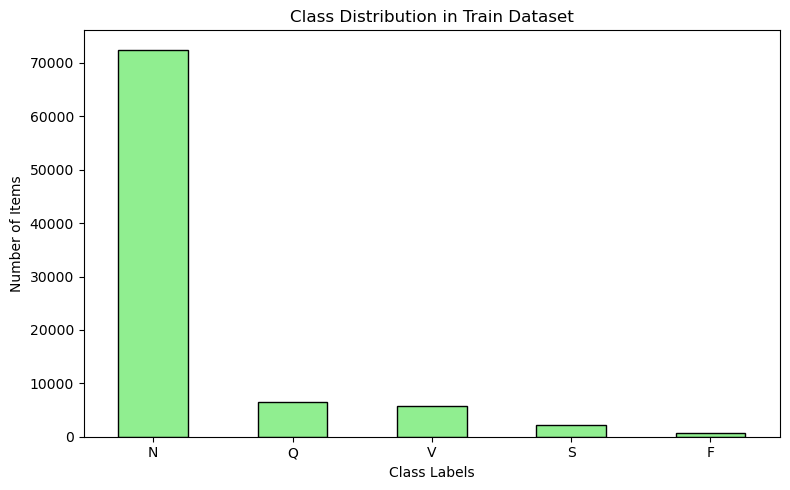

Class distribution in the Test Dataset: 187
N    18118
Q     1608
V     1448
S      556
F      162
Name: count, dtype: int64


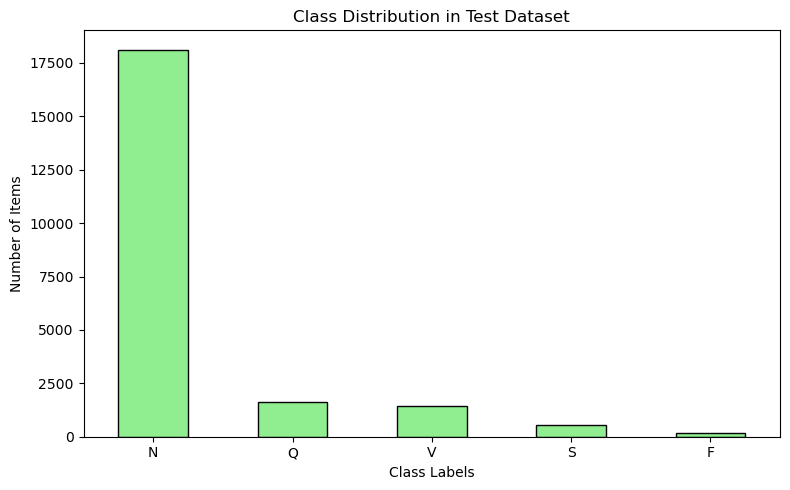

In [69]:
def plot_classdistribution(df, df_name, normalize=False):
  """
  Plots the class distribution of a given dataframe.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      df_name (str): The name of the dataframe (e.g., "Train Dataset" or "Test Dataset").
  """

  # Get class distribution
  class_counts = df.iloc[:, -1].value_counts(normalize=normalize)
  class_counts_labeled = class_counts.rename(index=label_names)

  # Print the number of items in each class
  print(f"Class distribution in the {df_name}: {class_counts_labeled}")
    
  # Convert class indices to labels
  class_labels = class_counts.index.map(label_names)

  # Create a figure for the plot
  plt.figure(figsize=(8, 5))

  # Plot the class distribution
  class_counts.plot(kind='bar', color='skyblue' if df_name == 'train' else 'lightgreen', edgecolor='black')
  plt.title(f'Class Distribution in {df_name}')
  plt.xlabel('Class Labels')
  plt.ylabel('Number of Items')
  plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

  # Show the plot
  plt.tight_layout()
  plt.show()

plot_classdistribution(df, "Train Dataset")
plot_classdistribution(df2, "Test Dataset")

8. Define the sampling frequency of the curves Fs = 360 and plot some of them. In particular, plot the waveforms in the range(first, last, 10000), where first and last are associated to the indices of the first and last items, respectively. The plots should have time in seconds on the xaxis,
and the associated label as title.

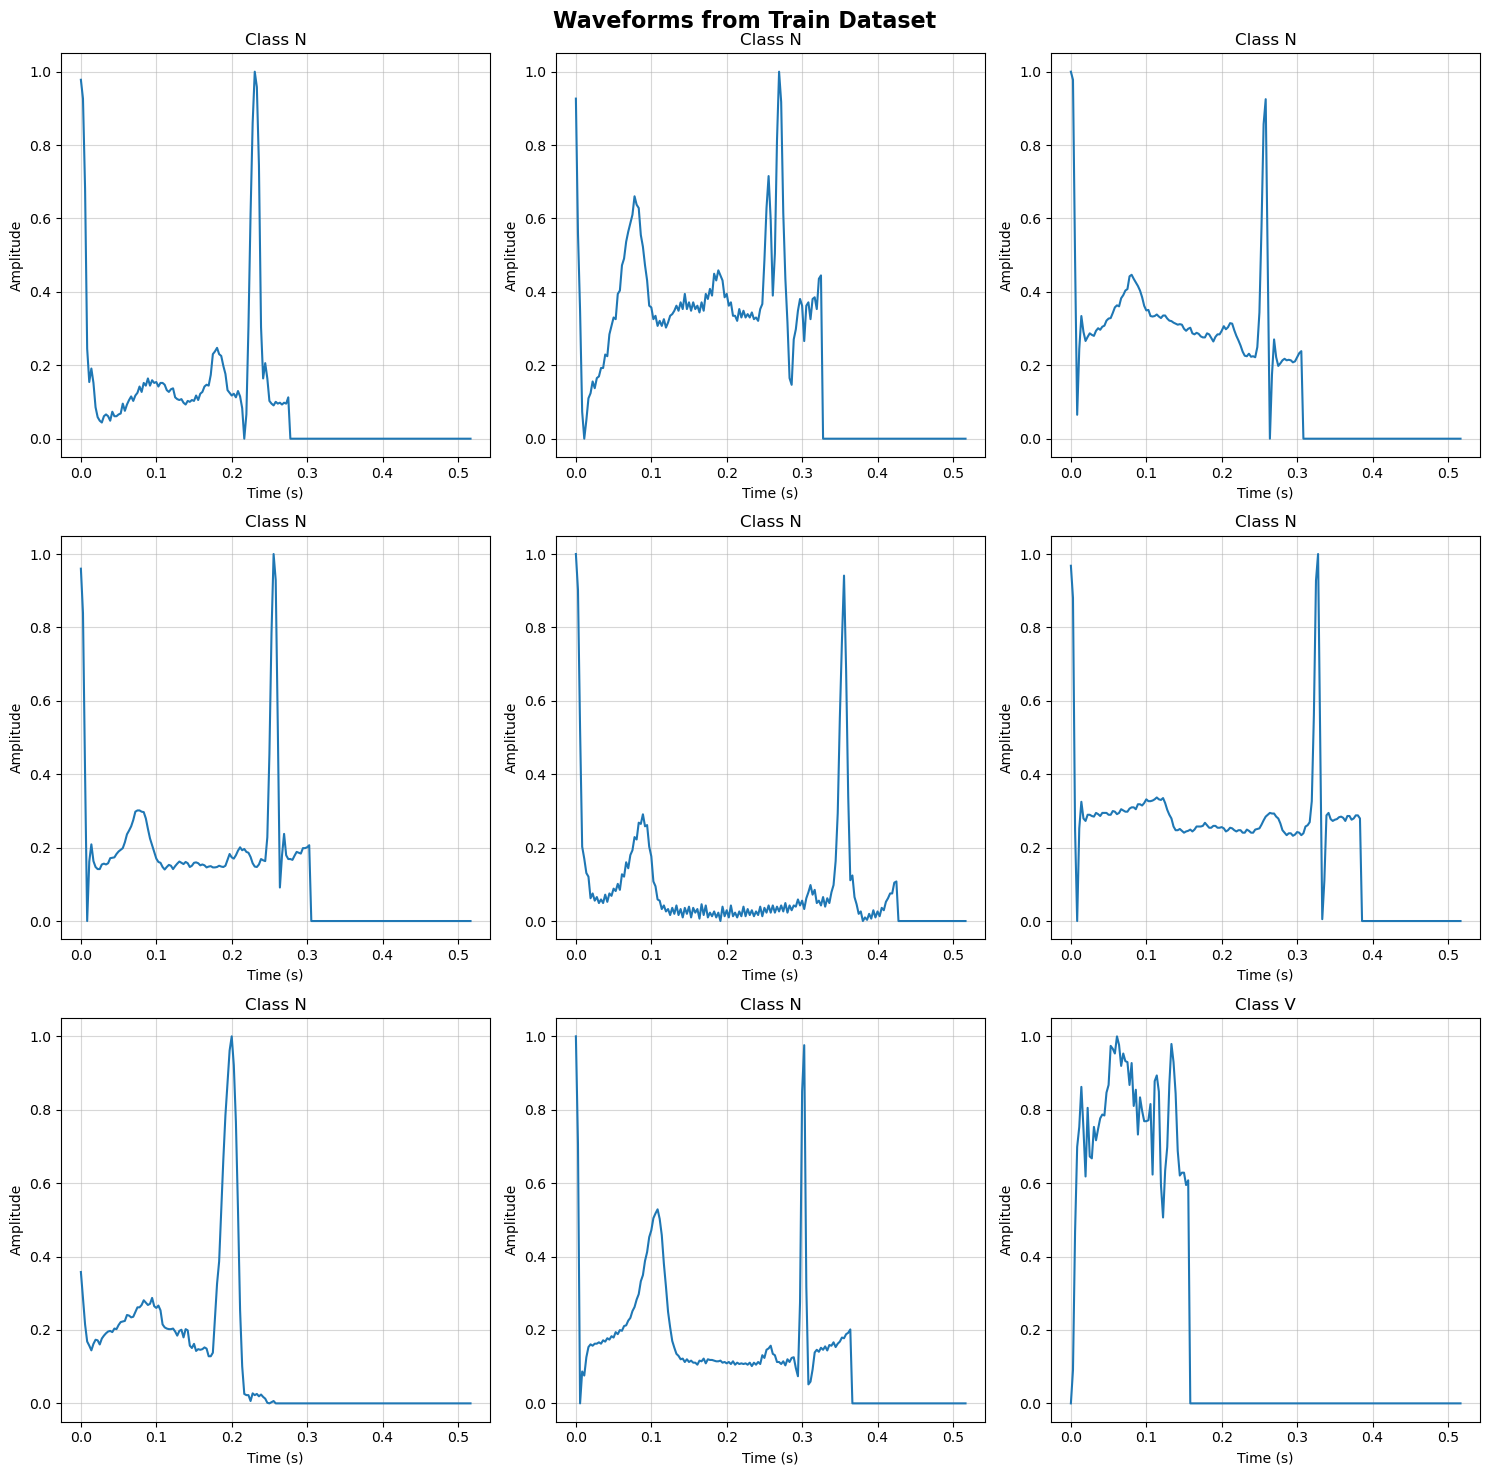

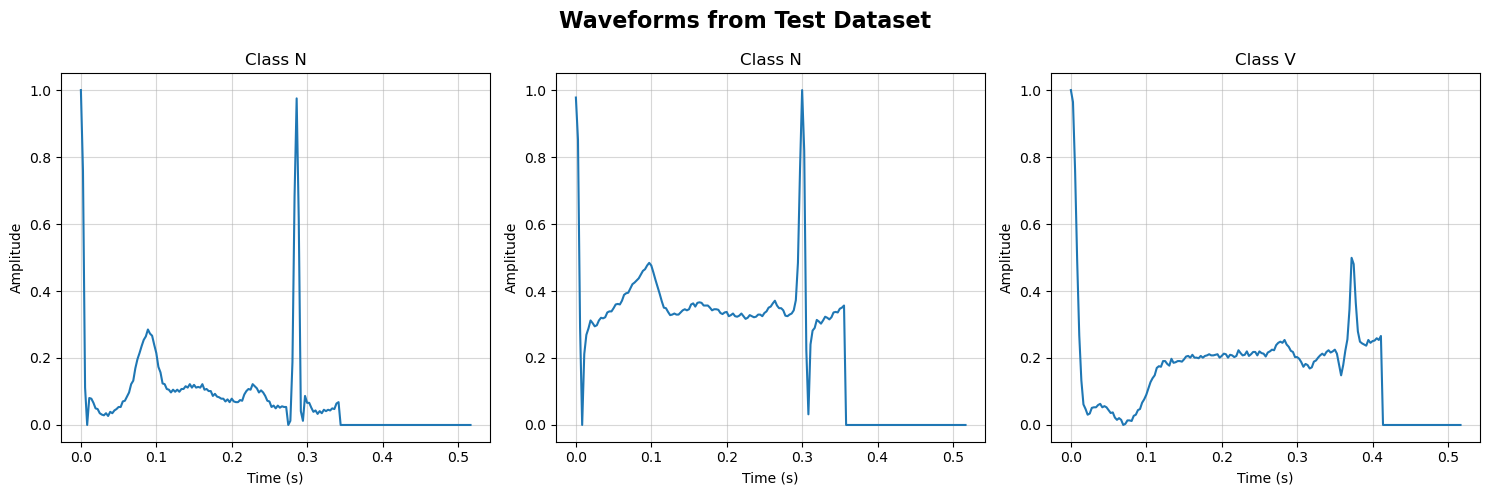

In [70]:
# Plot some ECG curves
Fs = 360

def plot_waveforms(df, df_name, label_names=label_names, step=10000):
    """
      Plots waveforms from a given DataFrame with a grid layout.

      Args:
          df (pandas.DataFrame): The DataFrame containing the data.
          df_name (str): The name of the DataFrame (e.g., "Train Dataset" or "Test Dataset").
          label_names (list, optional): A list of class labels corresponding to the classes in the DataFrame. Defaults to label_names (defined globally).
          step (int, optional): The step size for iterating through the DataFrame. Defaults to 10000.
      """
    
    # Define first and last indices (ex. row 87554 has index 87553)
    first, last = 0, df.shape[0] - 1

    # Create a time array in seconds
    time = np.arange(df.shape[1] - 1) / Fs
    
    # Number of columns and rows for the subplots
    n_cols = 3
    n_rows = (last - first) // step // n_cols + 1

    # Main figure (contains all the sublopts fot a certain df)
    plt.figure(figsize=(15, 5 * n_rows))
    plt.suptitle(f"Waveforms from {df_name}", fontsize=16, fontweight='bold')  

    # Plot each selected waveform
    for idx, i in enumerate(range(first, last + 1, step)): # The range function excludes the last value (ex. to get idx=87553 I had to put last=87554)
        
        # Select the waveform and corresponding label
        waveform = df.iloc[i, :-1].values # All columns except the last
        label = label_names[df.iloc[i, -1]] # Last column is label

        # Plot waveform
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.plot(time, waveform)
        plt.title(f"Class {label}") # Label the title with the class
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid(alpha=0.5)

    plt.tight_layout()
    plt.show()

plot_waveforms(df, "Train Dataset")
plot_waveforms(df2, "Test Dataset")



Typically, the 80% of the dataset is used for training, while the 20% for testing the model. In our case, data are already divided into two subsets as we have two distinct files. We will not use the whole dataset for training our classifier because this can easily occupy the whole RAM at disposal to Jupyter Notebook. Due to this reason, the performance of our classifier will probably not be the best possible but still suficient for the scope of this assignment. Then:
* In order to subsample the datasets, import the function train_test_split from sklearn.model selection. Such a function returns two sets drawn from the one in input according to the options provided as argument. We are interested only into the first returned value, thus the second one is to be discarded.
* Apply the function to split the train DataFrame df using the following options: train_size=0.1 and random_state=28. Name the first returned value train df (it is a DataFrame itself) and discard the second one.
* Apply the function once again to split this time the test DataFrame df2 using the following options: train_size=0.1 and random_state=5. Name the first returned value test df and discard the second one.
* Print the shape of the new DataFrames: you must obtain (8755, 188) for train df and (2189,188) for test df.
* Repeat the last two points of the previous list (i.e., point 7 and point 8) in order to print and plot the distributions of classes inside the newly defined DataFrames.
* Finally, remove the column related to the labels (i.e., the last column) from train_df and store it inside a new variable named labels_train. Such a new variable must be a list: you can use the tolist() method. Do the same for test_df and store said column into a variable named labels_test (and convert it into a list). Check and print the new shapes: you must obtain (8755, 187) for train_df, (2189, 187) for test_df, (8755, ) for labels_train, and (2189, ) for labels_test.

Subsampled Train Dataset shape:  (8755, 188)
Class distribution in the Subsampled Train Dataset: 187
N    7240
Q     634
V     623
S     201
F      57
Name: count, dtype: int64


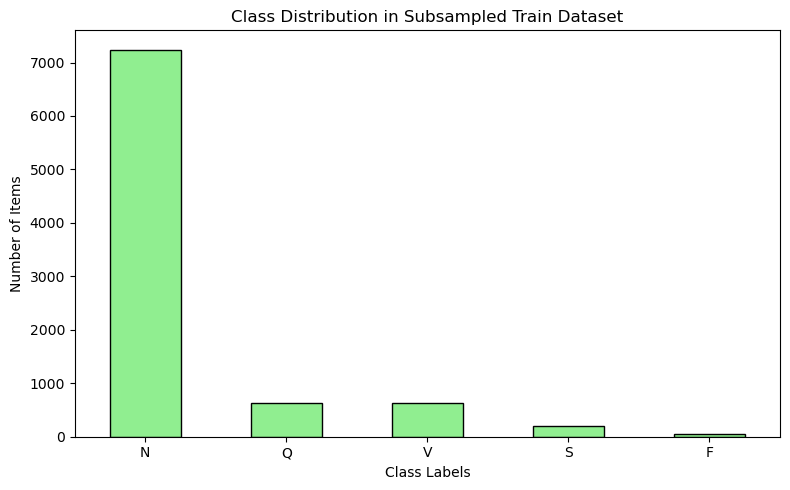

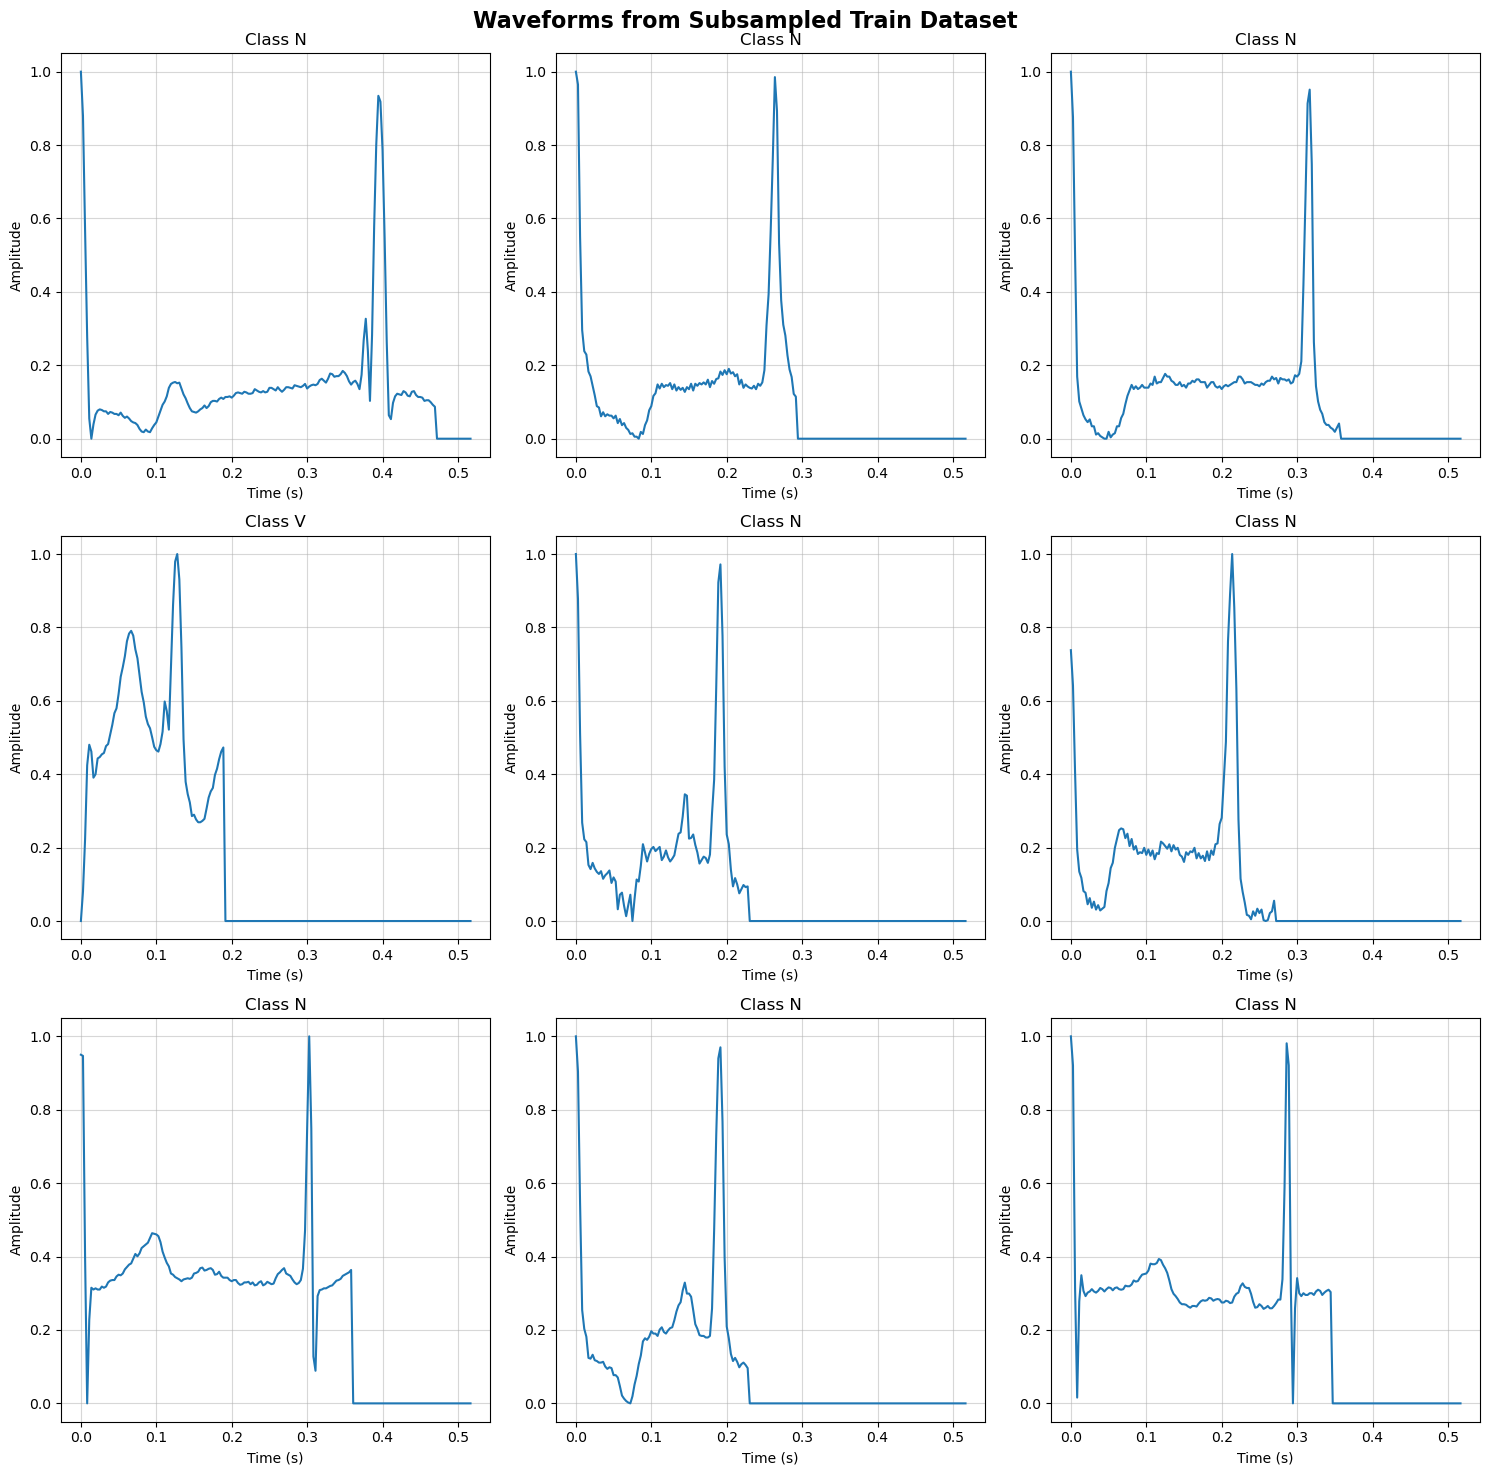

Subsampled Test Tataset shape:  (2189, 188)
Class distribution in the Subsampled Test Tataset: 187
N    1796
Q     159
V     153
S      62
F      19
Name: count, dtype: int64


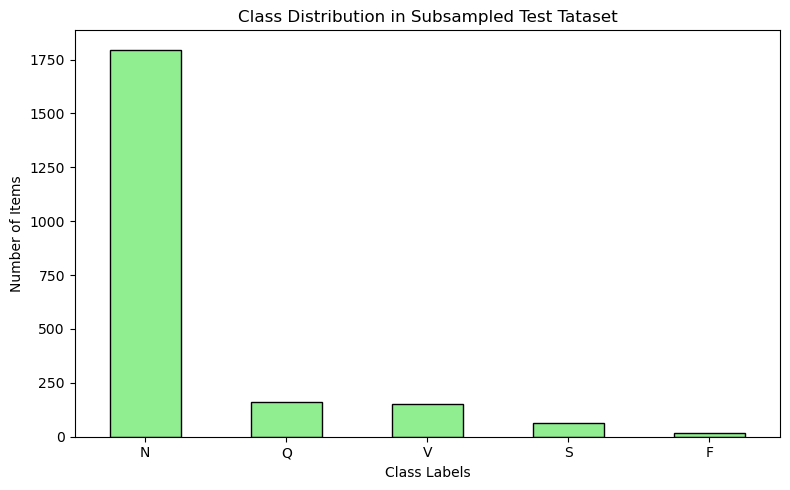

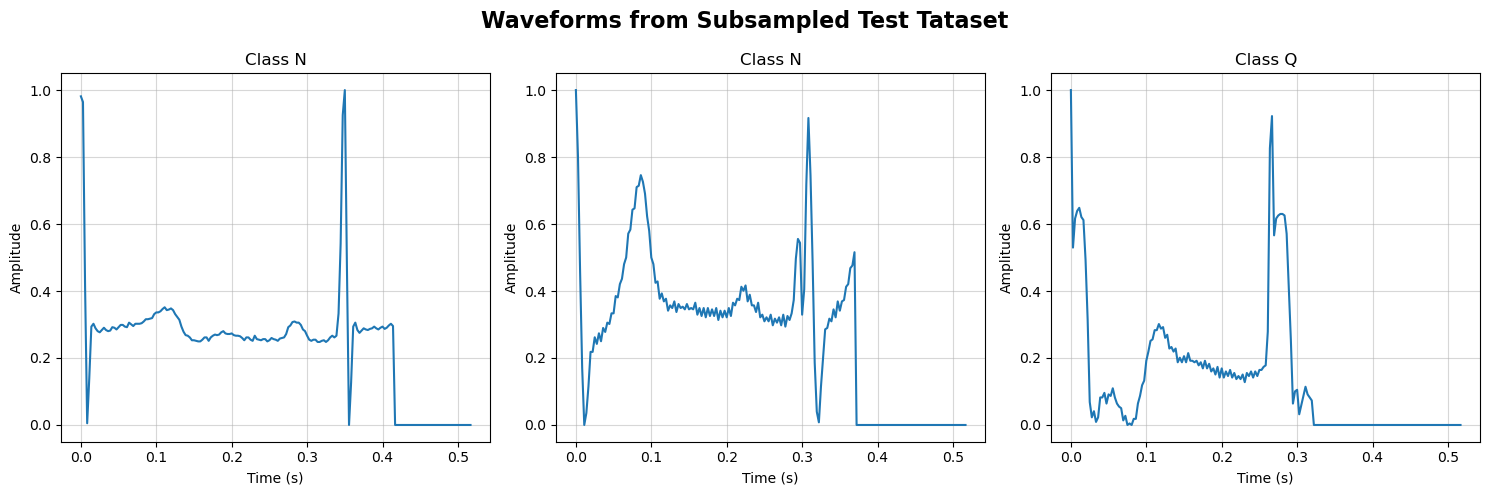

Subsampled Train Dataset labels shape: (8755,)
Subsampled Train Dataset shape without labels: (8755, 187)
Subsampled Test Dataset labels shape: (2189,)
Subsampled Test Dataset shape without labels: (2189, 187)


In [71]:
# Extract a subset of the dataset
from sklearn.model_selection import train_test_split

resize = 0.1


# Train

# Split the dataset
train_df,_ = train_test_split(df, train_size=resize, random_state=28)
print("Subsampled Train Dataset shape: ", train_df.shape)

# Plot the class distribution
plot_classdistribution(train_df, "Subsampled Train Dataset")

# Plot some ECG curves
plot_waveforms(train_df, "Subsampled Train Dataset", step=int(10000*resize))


# Test

test_df,_ = train_test_split(df2, train_size=resize, random_state=5)
print("Subsampled Test Tataset shape: ", test_df.shape)

plot_classdistribution(test_df, "Subsampled Test Tataset")

plot_waveforms(test_df, "Subsampled Test Tataset", step=int(10000*resize))



# Define label lists and data numpy arrays


# Train 

# Extract the last column (labels) as a Series
labels_train = train_df.iloc[:, -1]  
print("Subsampled Train Dataset labels shape:", labels_train.shape)  

# Convert the Series to a list
labels_train = labels_train.tolist()

# Remove the last column (labels) from the DataFrame
train_df = train_df.iloc[:, :-1]
print("Subsampled Train Dataset shape without labels:", train_df.shape)  


# Test

labels_test = test_df.iloc[: ,-1]  
print("Subsampled Test Dataset labels shape:", labels_test.shape)

labels_test = test_df.iloc[: ,-1].tolist()  

test_df = test_df.iloc[:, :-1]  
print("Subsampled Test Dataset shape without labels:", test_df.shape)

Class distribution in the Train Dataset: 187
N    0.827729
Q    0.073452
V    0.066108
S    0.025390
F    0.007321
Name: proportion, dtype: float64


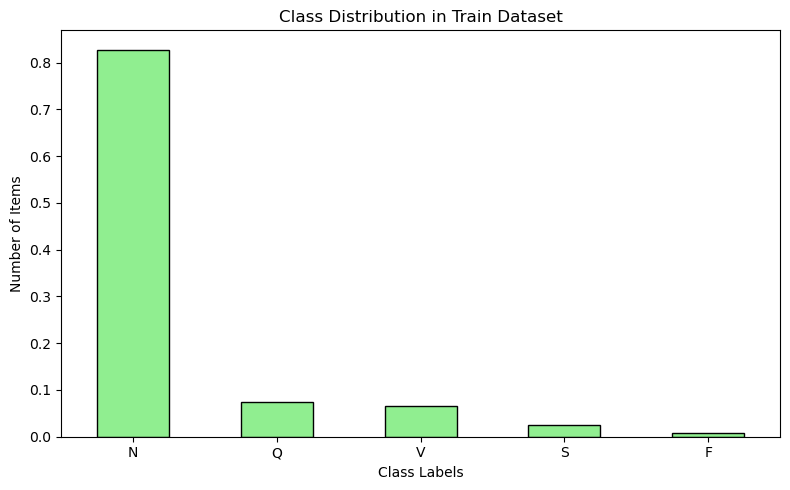

Class distribution in the Test Dataset: 187
N    0.827608
Q    0.073451
V    0.066143
S    0.025397
F    0.007400
Name: proportion, dtype: float64


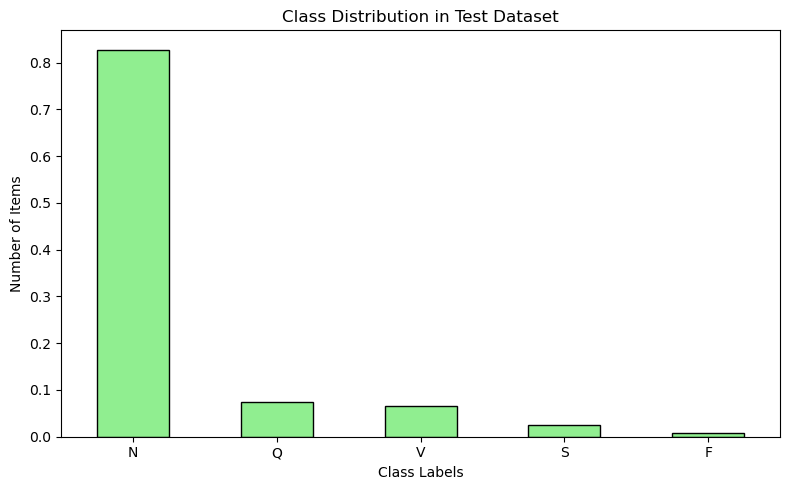

Class distribution in the Subsampled Train Dataset: 0
N    0.826956
Q    0.072416
V    0.071159
S    0.022958
F    0.006511
Name: proportion, dtype: float64


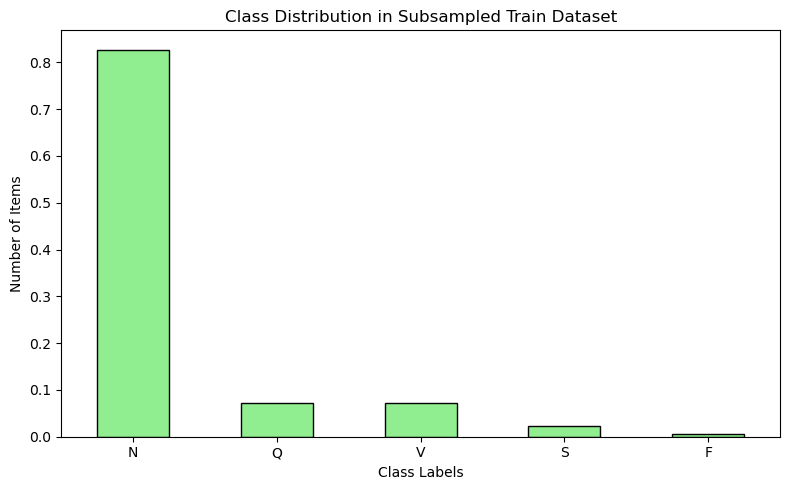

Class distribution in the Subsampled Test Dataset: 0
N    0.820466
Q    0.072636
V    0.069895
S    0.028323
F    0.008680
Name: proportion, dtype: float64


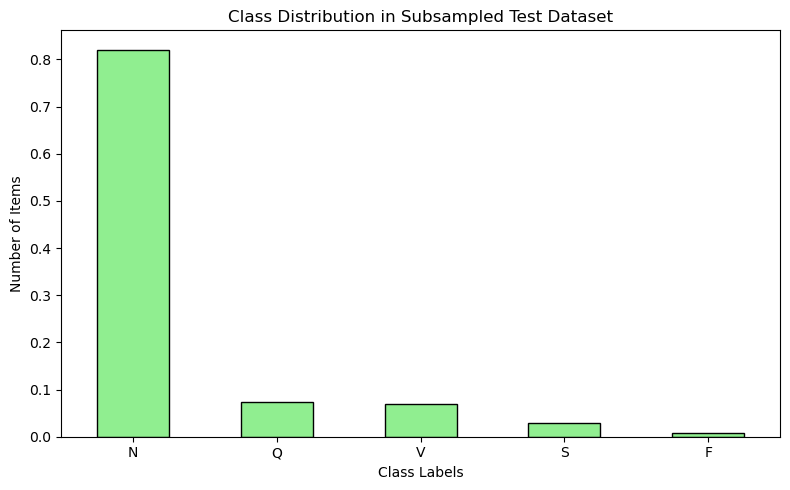

In [72]:
#Extra: plots the normalized class distribution for both the original and subsampled datasets to evaluate the effectiveness of sampling.
plot_classdistribution(df, "Train Dataset", normalize = True)
plot_classdistribution(df2, "Test Dataset", normalize = True)
plot_classdistribution((pd.concat([train_df, pd.Series(labels_train)], axis=1)), "Subsampled Train Dataset", normalize = True)
plot_classdistribution((pd.concat([test_df, pd.Series(labels_test)], axis=1)), "Subsampled Test Dataset", normalize = True)

_Note: from now on, we will refer to the subsampled datasets as simply "Test Dataset" and "Train Dataset", even though we are referring to the subsampled versions. This is for brevity and clarity._

### 1.2 Question 2

Now that you have loaded the dataset, you are able to process it. In particular, different curves will be characterized by different dynamic ranges; in addition, for the purpose of this task, we want the curves to cross the zero multiple times. Thus, in order to improve the generalization capability of the algorithms, we typically perform normalization on the data such that the model learns how to deal with waveforms characterized by same codomain. Perform the following steps:
* Define the variables train list and test list by converting the values of train df and test df into lists. You can use the tolist() method.
* Apply preprocessing on both the train list and test list. In particular, define a MinMaxScaler with feature range=(-1, 1). Then, apply it to train list and store the result into train set; do the same for test list but store the result into test set. Pay attention and reason about the difference between the fit transform and the transform methods. What should we employ for the train set? And for the test set? Explain why in your report. Then, verify the processing by plotting the first curve of train list on top of the first curve of train set. Please, add labels to the axes and the legend.

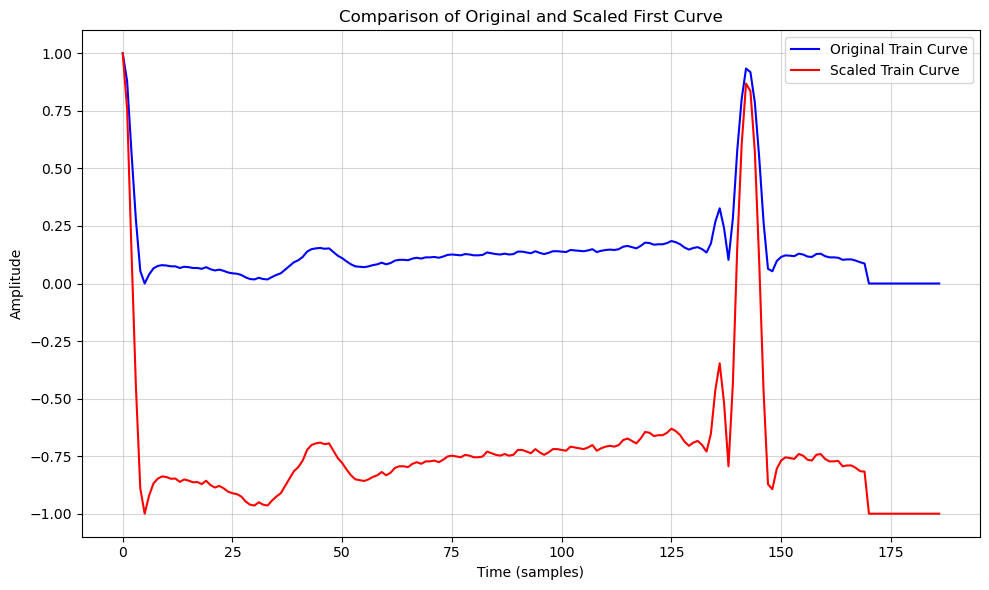

In [73]:
# Preprocessing

from sklearn.preprocessing import MinMaxScaler

# Convert the values of train dataset and test dataset to lists
train_list = train_df.values.tolist()  
test_list = test_df.values.tolist()

# Define the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply the scaler to the training data and store the result in train_set
train_set = scaler.fit_transform(train_list)

# Apply the same scaler to the test data and store the result in test_set
test_set = scaler.transform(test_list)



# Plot the first curve from train_list and train_set

def plot_overlaid_functions(func1, func2, func1_label, func2_label, fig_label, figsize=(10, 6)):
  """
  Plots two functions over one another on the same axes.

  Args:
      func1: The first function to be plotted.
      func2: The second function to be plotted.
      func1_label: Label for the first function (default: "Function 1").
      func2_label: Label for the second function (default: "Function 2").
      fig_label: Label the plot title
      figsize: A tuple specifying the width and height of the figure (default: (10, 6)).
  """

  # Create the plot
  plt.figure(figsize=figsize)

  # Plot the functions with labels and customize visual elements
  plt.plot(func1, label=func1_label, color='blue')
  plt.plot(func2, label=func2_label, color='red')

  # Enhance readability with meaningful labels, title, and legend
  plt.title(fig_label)
  plt.xlabel('Time (samples)')
  plt.ylabel('Amplitude')
  plt.legend(loc="best")
  plt.grid(alpha=0.5)

  # Display the plot with tight layout to avoid overlapping elements
  plt.tight_layout()
  plt.show()

plot_overlaid_functions(train_list[0], train_set[0], func1_label="Original Train Curve", func2_label="Scaled Train Curve", fig_label="Comparison of Original and Scaled First Curve")

In order to accomplish classification, we would like to extract a feature vector containing different rhythmic features. Hence, define the function compute feature vector which takes as inputs the ECG waveform x, the sampling frequency Fs, the length of the window N, the hop size H, and returns the feature vector. You find a prototype in the notebook. Perform then the following steps:
1. compute the standard deviation and the mean of the ECG waveform;
2. compute the zero-crossing rate using the librosa.feature.zero_crossing_rate function. Write in the report the definition of zero-crossing rate and why this is useful from the rhythmic perspective;
3. compute the standard deviation and the mean of the zero-crossing rate;
4. compute the STFT of the waveform using the librosa.stft function with n_fft=win_length=N and hop_length=H. Then take the absolute value and store the result into the variable C.
5. compute the spectral flux using the librosa.onset.onset_strength function with S=librosa.amplitude_to_db(C, ref=np.max). What is the definition of spectral flux? How canit be computed if we do not want to exploit librosa?
6. compute the standard deviation and the mean of the spectral flux;
7. define the feature vector f_vector by concatenating all the features you have computed (together with standard deviations and means);

In [74]:
def compute_feature_vector(x, Fs, N=64, H=16):
    """Compute the feature vector 

    Args:
        x: Input signal
        Fs: Sampling rate
        N: Window length
        H: Hop size

    Returns:
        f_vector: Feature vector
    """
    
    # Compute features
    
    # Compute standard deviation and mean of the ECG waveform
    std_dev = np.std(x)
    mean = np.mean(x)

    # Compute zero-crossing rate using librosa (windowed by N and hopped by H)
    zero_crossings = librosa.feature.zero_crossing_rate(y=x, frame_length=N, hop_length=H)

    # Compute standard deviation and mean of the zero-crossing rate
    std_dev_zcr = np.std(zero_crossings)
    mean_zcr = np.mean(zero_crossings)

    # Compute STFT of the waveform and take absolute value
    C = np.abs(librosa.stft(x, n_fft=N, hop_length=H))

    # Convert STFT to decibel scale
    C_db = librosa.amplitude_to_db(C, ref=np.max)
    
    # Compute spectral flux
    spectral_flux = librosa.onset.onset_strength(S=C_db, sr=Fs)

    # Compute standard deviation and mean of the spectral flux
    std_dev_flux = np.std(spectral_flux)
    mean_flux = np.mean(spectral_flux)

    
    # Concatenate numpy arrays
    f_vector = np.concatenate((
        [mean, std_dev], # Waveform statistics
        [mean_zcr, std_dev_zcr], # Zero-crossing rate statistics
        [mean_flux, std_dev_flux], # Spectral flux statistics
        zero_crossings.flatten(), 
        spectral_flux.flatten()
    ))
    
    
    return f_vector

Once the function is defined:
* Test it by computing the f vector on the first waveform of the train set. Print it and plot it.

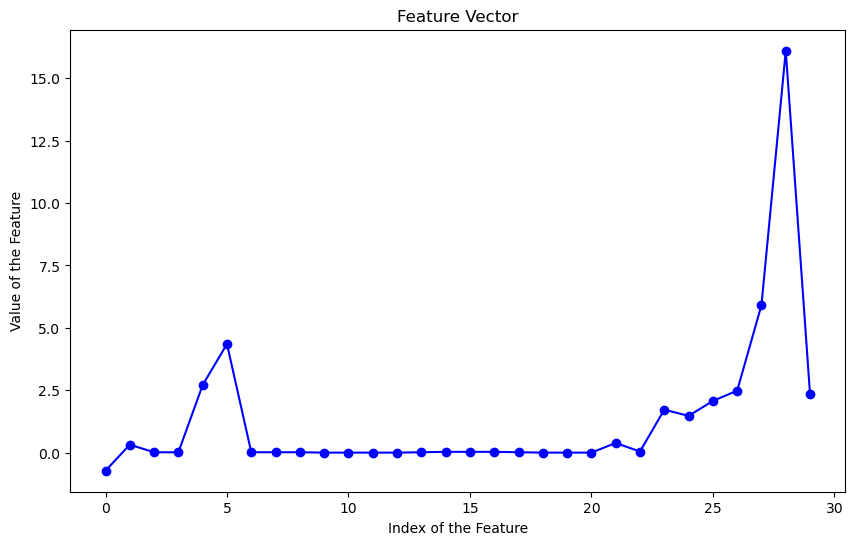

Feature Vector: [-7.25059656e-01  3.19224700e-01  1.43229167e-02  1.18625437e-02
  2.70895455e+00  4.35085265e+00  1.56250000e-02  1.56250000e-02
  1.56250000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.56250000e-02  3.12500000e-02  3.12500000e-02
  3.12500000e-02  1.56250000e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.85318319e-01  4.45850906e-02  1.71922240e+00
  1.47237698e+00  2.06821437e+00  2.48167564e+00  5.90702446e+00
  1.60993678e+01  2.32966957e+00]


In [75]:
# Test compute_feature_vector

# Define the sampling frequency
Fs = 360

# Take the first waveform in the train set
first_waveform = train_set[0]  

# Compute the feature vectore for the first waveform in the train set
f_vector = compute_feature_vector(first_waveform, Fs)

# Define a time array to plot the f_vector
time = np.arange(len(f_vector))

# Plot the feature vector as a waveform
plt.figure(figsize=(10, 6))
plt.plot(time, f_vector, color='blue', marker='o', linestyle='-')
plt.title('Feature Vector')
plt.xlabel('Index of the Feature')
plt.ylabel('Value of the Feature')
plt.show()

# Print the feature vector
print("Feature Vector:", f_vector)

* Use it for computing the f_vector of both the training set and the test set by collecting the results into two lists: train_fvector and test_fvector. In order to have a clue on the processing time, instantiate a progress bar using tqdm. In this phase, you must stick with the feature vector as is.
* Check the shapes of the two lists.

Provide comments in the report on the performed steps. In particular, address the questions mentioned in step 2 and step 5. What is the aim of a novelty function? Why do you think it is worth to add different rhythmic features? Can you spot any trade-off?

In [76]:
# Compute feature vector for both training and test sets
N = 64
H = 16
Fs = 360


# Train

# Define the starting and ending indices for the train set
first, last = 0, len(train_set)

# Initialize a list to store the feature vectors
train_fvector = []

# Iterate over the train set, computing and storing feature vectors
for idx in tqdm(range(first, last)):
    # Extract the current waveform from the train set
    waveform = train_set[idx]

    # Compute the feature vector for the waveform
    f_vector = compute_feature_vector(waveform, Fs, N=N, H=H)

    # Append the computed feature vector to the list
    train_fvector.append(f_vector)

print("Number of feature vectors computed for the train set: ", len(train_fvector))



# Test

first, last = 0, len(test_set) 

test_fvector= []

for idx in tqdm(range(first, last)):
    
    waveform = test_set[idx] 
    
    test_fvector.append(compute_feature_vector(waveform, Fs, N=N, H=H))
    
print("Number of feature vectors computed for the test set: ", len(test_fvector))

100%|█████████████████████████████████████████████████████████████████████████████| 8755/8755 [00:21<00:00, 410.34it/s]


Number of feature vectors computed for the train set:  8755


100%|█████████████████████████████████████████████████████████████████████████████| 2189/2189 [00:06<00:00, 362.81it/s]

Number of feature vectors computed for the test set:  2189


### 1.3 Question 3
We have extracted a feature vector containing different rhythmic features. It is now time to select a model for accomplishing classification. For this task, we are going to train a Support Vector Machine (SVM). The main idea of SVMs is finding a frontier which separates observations into classes. In particular, the objective of an SVM classifier is to find the best P-1 dimensional hyperplane - also called the decision boundary - which can separate a P-dimensional space into the classes of interest. Notably, a hyperplane is a subspace whose dimension is one less than that of its ambient space. SVM identifies the endpoints or end vectors that support this hyperplane while also maximizing the distance between them. Address the following points:
* SVMs take advantage of kernels for accomplishing clusterization. Study and learn how SVMs work and explain how different kernels can be considered for improving the performance of the model.
* Train an SVM using the sklearn.svm.SVC function. Start by setting C=10 and kernel=`rbf'.
* Save the model using the string format f'my_model/svc_{kernel}\_C_\{C}\_N_\{N}\_H_\{H}'. You can use, for example, joblib or pickle. In this way, you can load it without the need for training from scratch.
* Give a definition for hyperparameter. Typically, in order to tune hyperparameters, we try different combinations of model settings. In this point, however, we do not perform a grid search as we leave it for Question 1.5.

In [77]:
from sklearn.svm import SVC

# Define model parameters
kernel = 'rbf'
C = 10
N = 64  # example window length 
H = 16  # example hop size

# Train SVM model
svm_model = SVC(C = C, kernel = kernel)

# Save the SVM model into a file
file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
os.makedirs("my_model", exist_ok=True)  # Create directory
joblib.dump(svm_model, file_name)


['my_model/svc_rbf_C_10_N_64_H_16']

* In order to assess the quality of your training, compute the accuracy on the training set. Explain the concept of overfitting.

In [78]:
# Train (fit) the model on the train data
svm_model.fit(train_fvector, labels_train)

# Print the accuracy on the train set
train_accuracy = svm_model.score(train_fvector, labels_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

Train Accuracy: 88.28%


It is time to perform classification. By solving these points, you will find out if the model is able to accomplish the desired task. In particular:
* Test the trained classifier on the test set.

In [79]:
# Classify the test set
test_predictions = svm_model.predict(test_fvector)

* Print the accuracy. What can you tell just by looking at this mere number?
* What is a confusion matrix? What does it represent? Plot the confusion matrix for your prediction using sklearn. Does the classifier perform in the same fashion for all the classes? Is there a class for which it performs better? If yes, why?

Test Accuracy: 87.35%


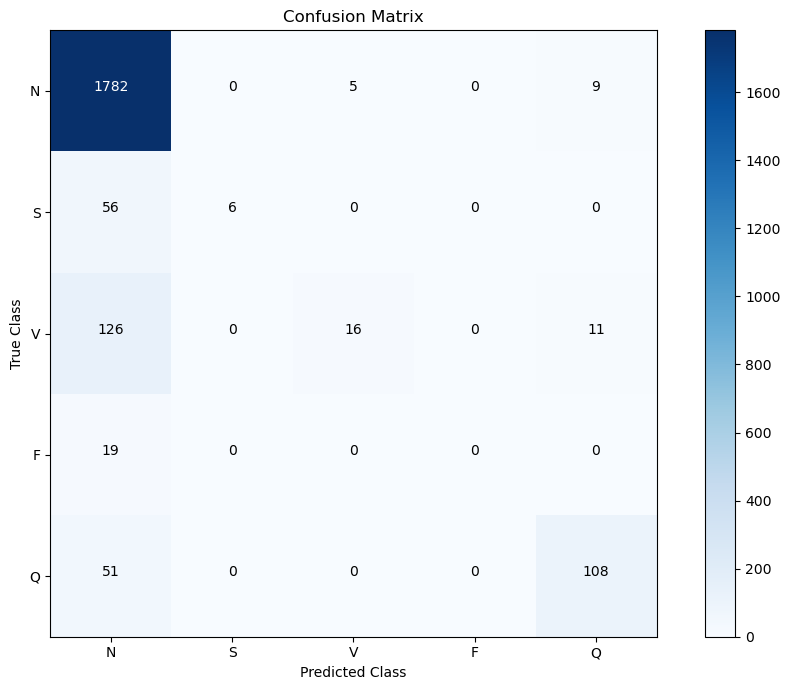

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def plot_confusionmatrix(cm, label_names=label_names, normalize=False):
  """
  Plots a confusion matrix with labels and annotations.

  Args:
      cm: Confusion matrix (2D numpy array).
      label_names: Dictionary mapping numerical labels to string labels.
      normalize: Whether to normalize the confusion matrix (default: False).
  """
  # Normalize the confusion matrix by row to get class-wise accuracy.
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.round(cm, decimals=2)

  # Create a heatmap-like plot
  plt.figure(figsize=(10, 7))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Class')
  plt.ylabel('True Class')

  # Add color bar
  plt.colorbar()

  # Add class labels to the axes
  if label_names is not None:
    tick_marks = np.arange(len(label_names))
    plt.xticks(tick_marks, label_names.values())
    plt.yticks(tick_marks, label_names.values())

  # Annotate the confusion matrix
  thresh = cm.max() / 2
  for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], 
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  # Display the plot
  plt.tight_layout()
  plt.show()

# Print the accuracy on the test set
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(labels_test, test_predictions)

# Plot the confusion matrix
plot_confusionmatrix(cm)

* At this point, you should have understood that the mere accuracy is not enough to verify the performance of a classifier. In particular, it is always better to take a look at other metrics. To this aim, use the function classification_report of the library sklearn.metrics to compute recall and f1-score. Please, provide the definitions for this two metrics and comment on the results. How should we interpret the values? Do we have to minimize or maximize them?
* The confusion matrix is built upon the information provided by the so-called _false positive, false negative, true positive, and true negative_. Write the definition of each of them and how can we obtain such values. When we solve tasks in a data-driven fashion, we should always take into account the characteristics of the particular task that we are solving. We do not have just to look at numbers. In particular, our task is to detect an anomaly in the heart rate. In the light of this consideration, apart from the true positive, which of the other three values is the one that we care the most? Once you have chosen it, compute it and print it.

Print and plot everything, and provide comments in the report. How does the model perform on the test set? Why does it perform differently from the training set? Comment on the confusion matrix. Can you explain why the relative accuracy of certain classes is higher than others?

In [81]:
# Classification report

from sklearn.metrics import classification_report

def print_false_negatives(cm, label_names = label_names):
  """Prints false negatives for each class.

  Args:
    cm: Confusion matrix.
    label_names: Dictionary mapping class indices to class labels.
    
  """
    
  # Calculate the false negatives for each abnormal class  
  for class_idx in range(1, cm.shape[0]): # Loop through each abnormal class (1 to 4)
    false_negatives = cm[class_idx, 0]  # False negatives for each class (misclassified as class 0)
    class_label = label_names[class_idx]
    print(f"False Negatives for Class {class_label} (misclassified as Normal): {false_negatives}")

  # Calculate total false negatives (all anomalies misclassified as normal)
  total_false_negatives = sum(cm[1:, 0])
  print(f"Total False Negatives (anomalies classified as Normal): {total_false_negatives}")

# Compute classification report
report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
print(report)

# Print false negatives for each class and the total number of false negatives.
print_false_negatives(cm)

              precision    recall  f1-score   support

           N       0.88      0.99      0.93      1796
           S       1.00      0.10      0.18        62
           V       0.76      0.10      0.18       153
           F       0.00      0.00      0.00        19
           Q       0.84      0.68      0.75       159

    accuracy                           0.87      2189
   macro avg       0.70      0.37      0.41      2189
weighted avg       0.86      0.87      0.84      2189

False Negatives for Class S (misclassified as Normal): 56
False Negatives for Class V (misclassified as Normal): 126
False Negatives for Class F (misclassified as Normal): 19
False Negatives for Class Q (misclassified as Normal): 51
Total False Negatives (anomalies classified as Normal): 252


### 1.4 Question 4
If we take a look at the items for each class (the bar plots), we immediately see that the dataset is really unbalanced. What we typically do (or at least wish to do) is to let the model learn from a balanced representation of the input space, otherwise some biases can arise. To this aim, we may think to redefine the dataset in such a way to have the same amount of items per class. Thus:
* Initialize an empty DataFrame named train df. Starting from df, extract a new dataset by using for each class the sample method as sample(641, random state=42) and assign it to train_df (Hint: use loc and iloc for finding all the items related to a certain class, and then apply the sample method to draw only from that restricted amount of items). Print and check the shape of train df: it must be equal to (3205,188).
* Do the same for the test set. Initialize an empty DataFrame named test_df. Starting from df2, extract a new dataset by using for each class the sample method as sample(162, random state=42) and assign it to test df. Print and check the shape of test df: it must be equal to (810,188).
* Finally, convert the values of train df and test df to lists.

In [82]:
# New datasets


# Train

# Initialize an empty DataFrame to store the train dataset
train_df = pd.DataFrame()

# Iterate over each class and sample 641 instances from each class
for label in class_labels: # from question 1.1: class_labels = df.iloc[:, -1].unique()
    # Select rows where the label is the current class
    class_data = df[df.iloc[:, -1] == label]
    
    # Sample 641 instances from the class 
    sampled_class_data = class_data.sample(641, random_state=42)
    
    # Append the sampled data to the train_df DataFrame
    train_df = pd.concat([train_df, sampled_class_data], axis=0)  #axis=0 specifies that the concatenation is to be performed verticallyw

# Check the shape of the resulting train dataset
print("Shape of sampled Train Dataset:", train_df.shape)

# Convert dataframe to list
train_list = train_df.values.tolist()  


# Test    

test_df = pd.DataFrame()

for label in class_labels2:
    class_data2 = df2[df2.iloc[:, -1] == label]
    
    sampled_class_data2 = class_data2.sample(162, random_state=42)
    
    test_df = pd.concat([test_df, sampled_class_data2], axis=0)

print("Shape of sampled Test Dataset:", test_df.shape)

test_list = test_df.values.tolist()

Shape of sampled Train Dataset: (3205, 188)
Shape of sampled Test Dataset: (810, 188)


In this process, however, we are limited by the smallest number of items in the classes, i.e., 641 for the train set and 162 for the test set. We know that the performance of machine learning models is strictly dependent on data, and, typically, the more the data the better the performance. Thus, in order to remove the constraint imposed by the dataset, we can rely on data augmentation techniques. The purpose of such techniques is on the one hand to increase the number of tracks in the train dataset, on the other hand to improve the robustness and generalizability of the model. The augmentations are typically applied with a certain probability in order to prevent biases in the datasets. You are going to implement two simple methods: the first will stretch the waveform, the second will modify the amplitude. Address the following points:
* Define a class name augment. The constructor, in this case, is not responsible for any particular setting.
* Define a class method named stretch, which has as arguments self and the signal x, and performs the operations:
1. define the new number of samples _l_ as \begin{align} l &= 187 \cdot \left( 1 + \frac{\beta - 0.5}{3} \right) \\ \end{align} where $\beta$ is a random number in \[0, 1] and can be computed with the random.random() function. Cast then _l_ as an int;
2. resample the signal x to have _l_ samples using the scipy.signal.resample function and assign the result to the variable y;
3. then, implement the following conditional structure: if _l_ < 187 create an np.array y1 full of zeros of shape (187,) and assign the slice y1\[:l] = y. Else, assign the slice y1\[:187] = y;
4. return y1.
* Define a class method named amplify, which has as arguments self and the signal x, and performs the operations:
1. generate a random number $\alpha \in [-0.5, 0.5]$;
2. return the value x * ($\alpha$ + 1).

Now, we need a method that applies such augmentations. Define a class method named perform, which has as arguments self, x. As mentioned above, we want the augmentations to be randomly applied. In other words, we want the method to apply stretch, amplify, both, or neither of them in a random fashion. To this aim, perform the following operations:
1. initialize an empty variable named performed augmentations. In this variable, you will store the augmentations that are performed such that you can keep track of them (since you do not know which ones are applied as they are random);
2. implement the conditional structure: if the np.random.binomial(1, 0.5) == 1, apply the stretch to x and add the string `stretch' to performed augmentations;
3. implement the conditional structure: if the np.random.binomial(1, 0.5) == 1, apply the amplify to x and add the string `amplify' to performed augmentations;
4. return the values x, performed augmentations.

In [83]:
# Define Augmentation class

class augment:
    def __init__(self):
        pass  # Empty constructor, no initialization needed

    def stretch(self, x):
        """Stretches the waveform by a random factor."""
        
        # Generate a random number between 0 and 1
        beta = random.random()
        
        # Calculate the new length
        l = int(187 * (1 + (beta - 0.5) / 3))
        
        # Resample the waveform
        y = scipy.signal.resample(x, l) 

        # Ensure the output waveform has the desired length (187 samples)
        if l < 187:
            y1 = np.zeros(187)
            y1[:l] = y
        else:
            y1 = y[:187]

        return y1

    def amplify(self, x):
        """Amplifies the waveform by a random factor."""
        
        # Generate a random number between -0.5 and 0.5
        alpha = random.uniform(-0.5, 0.5)  
        
        return x * (alpha + 1)

    def perform(self, x):
        """Performs random augmentations on the waveform.

        Args:
            x: The input waveform.

        Returns:
            A tuple containing the augmented waveform and a list of applied augmentations.
        """
        
        # List to track applied augmentations
        performed_augmentations = [] 
        
        # Randomly apply stretch
        if np.random.binomial(1, 0.5) == 1:
            x = self.stretch(x)
            performed_augmentations.append('stretch')

        # Randomly apply amplify
        if np.random.binomial(1, 0.5) == 1:
            x = self.amplify(x)
            performed_augmentations.append('amplify')

        return x, performed_augmentations

At this point, you have your class augment and you are ready to test it. Thus:
* Instantiate the class augment.
* Perform the augmentation on the first item of train list (remember to remove the last column) and print the list of augmentations.
* Plot the augmented version on top of the original one. Add labels and a legend.
* Repeat the previous points multiple times in order to test the randomness of the augmentation.

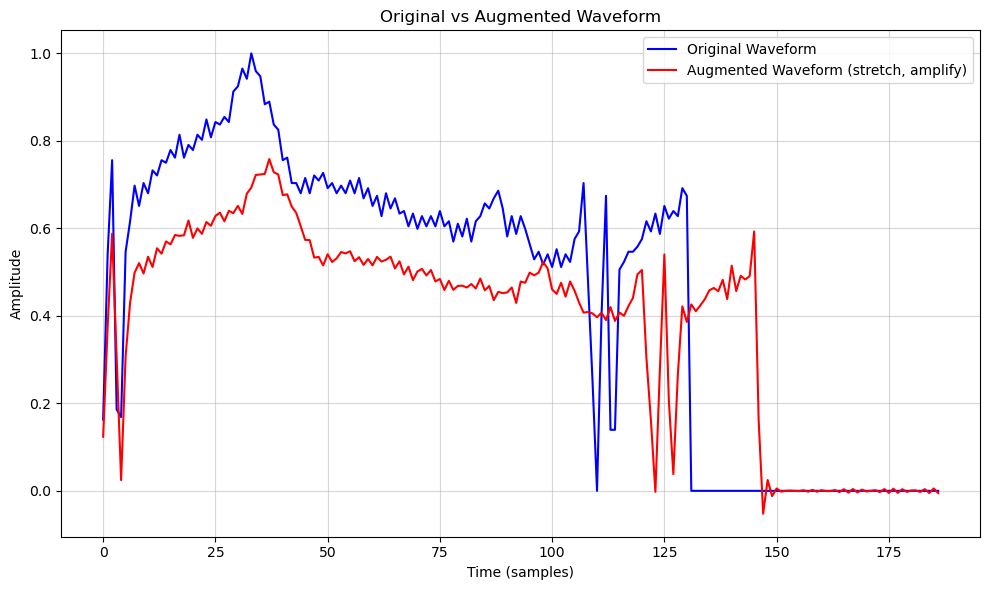

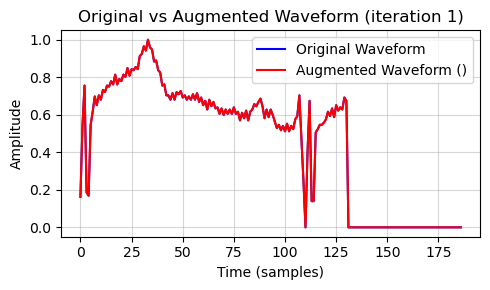

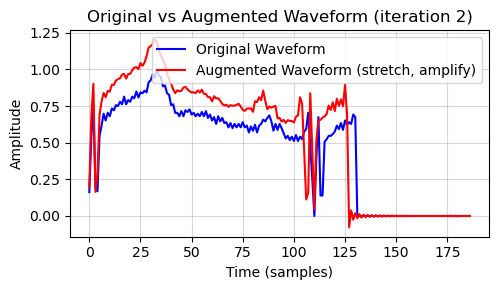

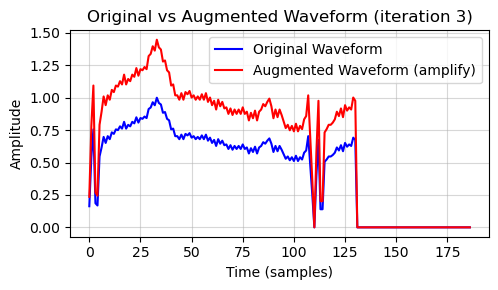

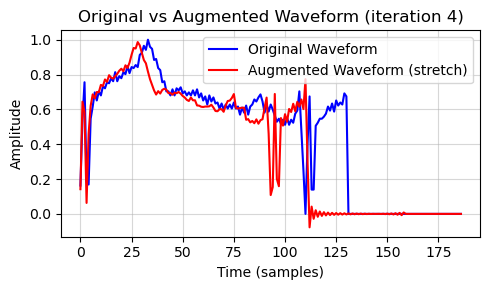

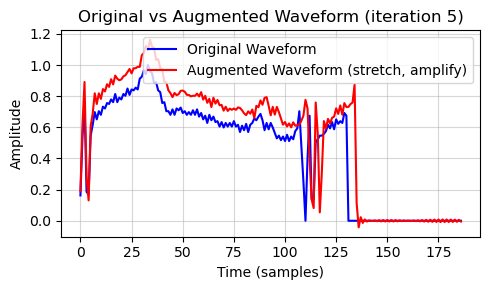

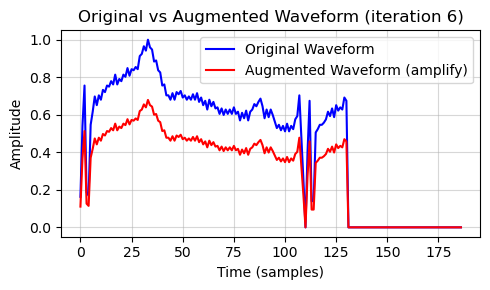

In [84]:
# Test augment class

# Instantiate augment class
augmenter = augment()

# Perform augmentation on the first item of train_list (excluding the last column)
x = np.array(train_list[0][:-1])  # Exclude the label column
augmented_x, augmentations = augmenter.perform(x)


# Plot

# Plot the original and the augmented waveforms
plot_overlaid_functions(x, augmented_x, "Original Waveform", f"Augmented Waveform ({', '.join(augmentations)})", "Original vs Augmented Waveform", figsize=(10, 6))

# Multiple plots
for idx in range(6):
    # Select the waveform and corresponding label 
    x = np.array(train_list[0][:-1])  # Original waveform
    augmented_x, augmentations = augmenter.perform(x)  # Augmented waveform
    
    # Plot original and augmented waveforms
    plot_overlaid_functions(x, augmented_x, "Original Waveform", f"Augmented Waveform ({', '.join(augmentations)})", f"Original vs Augmented Waveform (iteration {idx + 1})", figsize=(5, 3))

It is now time to apply such augmentations to our train dataset. In particular:
* Define the variable containing the number of waveforms per class that we want to add to our dataset n_aug=100.
* Instantiate the class. Then, for each class, start directly from df and extract n_aug items using sample(n_aug, random state=16). You can exploit loc and iloc to obtain the subset of df related to a certain class.
* For each of the n_aug items perform the augmentation (remember to remove the last column) and concatenate the augmented waveform to train_df.
* Print the counts for each class and the shape of train_df like you did in some of the previouspoints. You should obtain a shape of (3705, 188) and an equal count per class.

Sampled train dataset shape: (3705, 188)
Class distribution in the Sampled Train Dataset: 187
N    741
S    741
V    741
F    741
Q    741
Name: count, dtype: int64


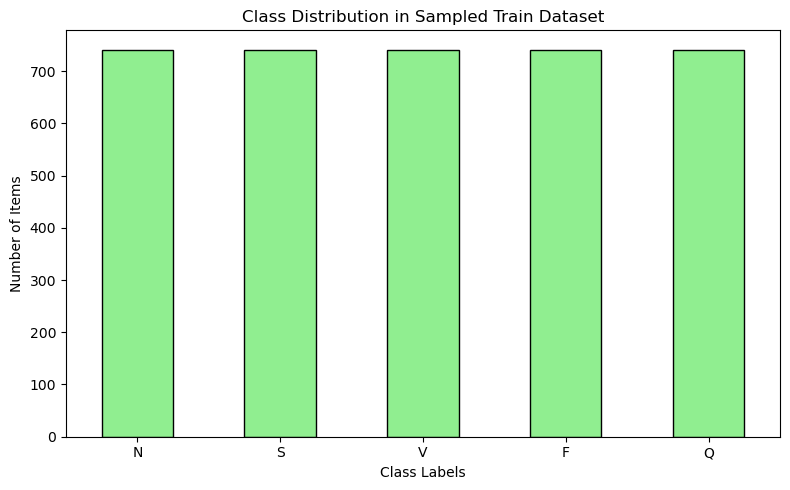

In [85]:
# Augment the train dataset
n_aug = 100

# Instantiate augment class
augmenter = augment()

augmented_df= pd.DataFrame()

# Iterate over each class and sample 100 instances from each class
for label in class_labels:
    # Select rows where the label is the current class
    class_data = df[df.iloc[:, -1] == label]
    
    # Sample 100 instances from the class (random_state ensures reproducibility)
    sampled_class_data = class_data.sample(n=n_aug, random_state=16)
    
    # Append the sampled data to the augmented_df DataFrame
    augmented_df = pd.concat([augmented_df, sampled_class_data], axis=0)

# Iterate over each waveform of the augmented_df
for idx in range(augmented_df.shape[0]):
    # Select the waveform and exclude the label 
    x = np.array(augmented_df.iloc[idx, :-1])
    label = augmented_df.iloc[idx, -1]  

    # Perform augmentations
    augmented_x, _ = augmenter.perform(x)

    # Combine augmented data with the label
    new_row = np.append(augmented_x, label)  
    new_row_df = pd.DataFrame([new_row], columns=train_df.columns)  

    # Append the augmented data back to train_df
    train_df = pd.concat([train_df, new_row_df], ignore_index=True)

# Print the shape of the train dataset 
print("Augmented train dataset shape:", train_df.shape)

# Print the number of items in each class
plot_classdistribution(train_df, "Augmented Train Dataset")

* Convert both train df and test df to lists with names train list and test list, respectively.
* Fit and apply a new MinMaxScaler for normalizing both train df and test df and repeat all the remaining operations that are required to have your data ready for training your classifier.

Print and plot data when required and add labels to the axis, as well as legends. Write comments in the report. Which other augmentations could you implement to serve the scope (you do not have to actually implement them)?

Sampled Train Dataset labels shape: (3705,)
Sampled Train Dataset shape without labels: (3705, 187)
Sampled Test Dataset labels shape: (810,)
Sampled Test Dataset shape without labels: (810, 187)


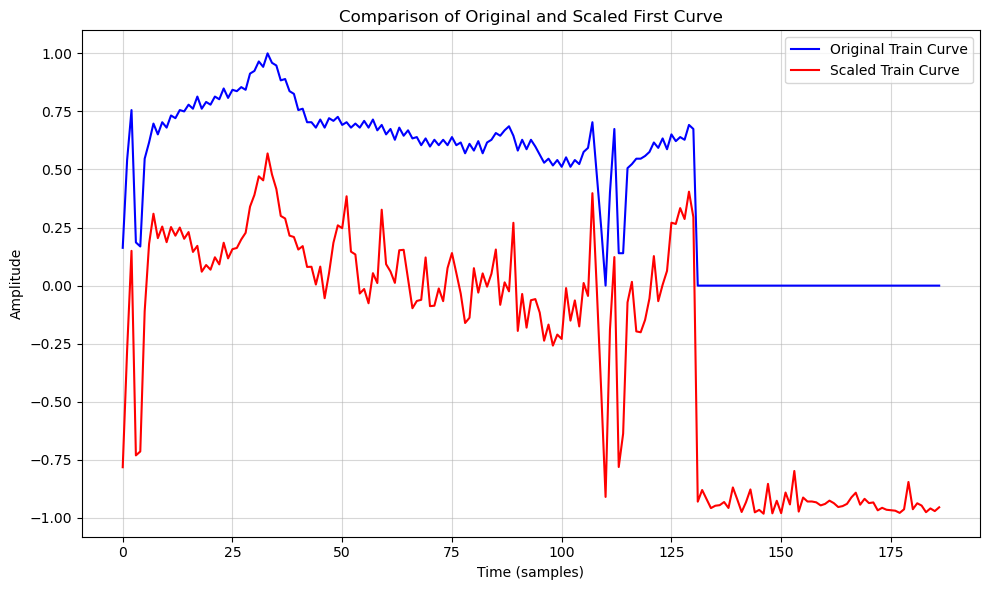

In [86]:
# Preprocessing


# Extract the last column (labels) as a Series
labels_train = train_df.iloc[:, -1]  
print("Augmented Train Dataset labels shape:", labels_train.shape)  
# Convert the Series to a list
labels_train = labels_train.tolist()
# Remove the last column (labels) from the DataFrame
train_df = train_df.iloc[:, :-1]
print("Augmented Train Dataset shape without labels:", train_df.shape)  

labels_test = test_df.iloc[: ,-1]  
print("Augmented Test Dataset labels shape:", labels_test.shape)
labels_test = test_df.iloc[: ,-1].tolist()  
test_df = test_df.iloc[:, :-1]  
print("Augmented Test Dataset shape without labels:", test_df.shape)


# Convert the values of train dataset and test dataset to lists
train_list = train_df.values.tolist()  
test_list = test_df.values.tolist() 

# Define the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply the scaler to the training data and store the result in train_set
train_set = scaler.fit_transform(train_list)

# Apply the same scaler to the test data and store the result in test_set
test_set = scaler.transform(test_list)

# Plot the first curve from train_list and train_set
plot_overlaid_functions(train_list[0], train_set[0], func1_label="Original Train Curve", func2_label="Scaled Train Curve", fig_label="Comparison of Original and Scaled First Curve")

Class distribution in the Sampled Train Dataset: 0
N    741
S    741
V    741
F    741
Q    741
Name: count, dtype: int64


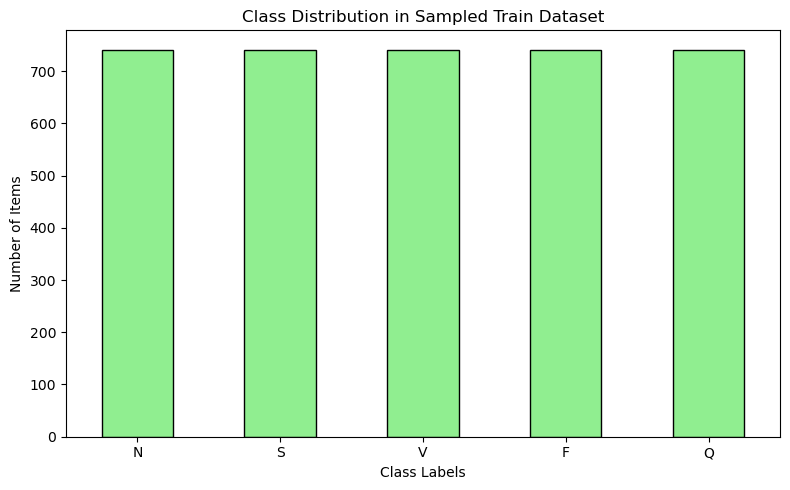

Class distribution in the Sampled Test Dataset: 0
N    162
S    162
V    162
F    162
Q    162
Name: count, dtype: int64


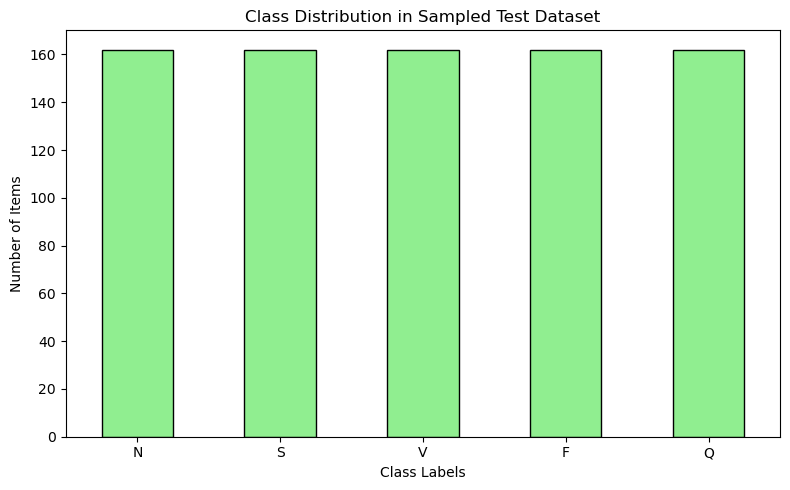

In [87]:
# Count the values for each class

# Train
plot_classdistribution((pd.concat([pd.DataFrame(train_set), pd.Series(labels_train)], axis=1)), "Augmented Train Dataset")

#Test 
plot_classdistribution((pd.concat([pd.DataFrame(test_set), pd.Series(labels_test)], axis=1)), "Augmented Test Dataset")

### 1.5 Question 5
It is time to train our new classifier on the augmented dataset and perform the classification in order to verify if the new dataset is actually able to provide us with a better classification. In particular:
* Compute the feature vectors of train set and test set. Then, train the classifier starting with a kernel rbf and C=10.
* Test the trained classifier on the test set.

In [88]:
# Compute feature vector for both training and test sets

N = 64
H = 16
Fs = 360



# Train

# Define the starting and ending indices for the train set
first, last = 0, len(train_set) 

# Initialize a list to store the feature vectors
train_fvector= []

# Iterate over the train set, computing and storing feature vectors
for idx in tqdm(range(first, last)):

    # Extract the current waveform from the train set
    waveform = train_set[idx]  

    # Compute the feature vector for the waveform and append the computed feature vector to the list
    train_fvector.append(compute_feature_vector(waveform, Fs))

print("Number of feature vectors computed for the augmented train set: ", len(train_fvector))



# Test
first, last = 0, len(test_set) 
test_fvector= []
for idx in tqdm(range(first, last)):
    waveform = test_set[idx]  
    test_fvector.append(compute_feature_vector(waveform, Fs))
print("Number of feature vectors computed for the augmented test set: ", len(test_fvector))



100%|█████████████████████████████████████████████████████████████████████████████| 3705/3705 [00:08<00:00, 423.09it/s]


Number of feature vectors computed for the train set:  3705


100%|███████████████████████████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 435.82it/s]

Number of feature vectors computed for the test set:  810


In [89]:
kernel = 'rbf'
C = 10

# Train SVC
svm_model = SVC(C = C, kernel =kernel)

# Save the SVC model into a file
file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
os.makedirs("my_model", exist_ok=True)  
joblib.dump(svm_model, file_name)

# Train (fit) the model on the train data
svm_model.fit(train_fvector, labels_train)

SVC(C=10)

* Print the accuracy. How is it different with respect to the previous case? Does the model overfit?

In [90]:
# Print the accuracy on the train set
train_accuracy = svm_model.score(train_fvector, labels_train) 
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")


Train Accuracy: 71.88%


* Plot the confusion matrix for your prediction and use the function classification_report to obtain accuracy, recall, and f1-score values. Print also the metric (among true negative, false positive, and false negative) that you selected in Question 1.3. How are the results? Does the classifier perform generally better? If yes, can you guess why? How are the recall and f1-score values with respect to the previous case?

Test Accuracy: 68.52%


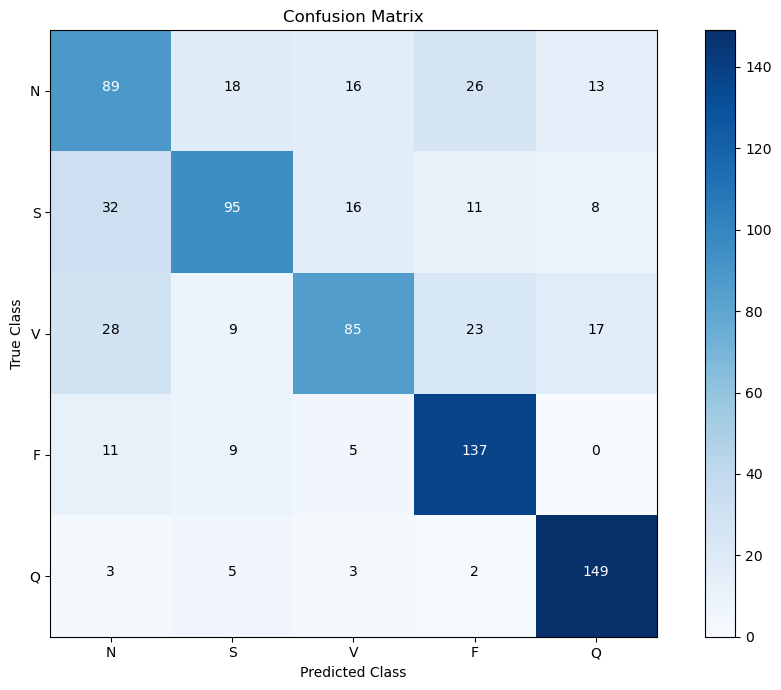

In [91]:
# Classify the test set

# Make predictions on the test set
test_predictions = svm_model.predict(test_fvector)


# Print the accuracy

# Calculate accuracy on the test set and print it
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Plot the confusion matrix

# Calculate the confusion matrix
cm = confusion_matrix(labels_test, test_predictions)

# Plot the confusion matrix
plot_confusionmatrix(cm)

In [92]:
# Classification report

# Compute and print classification report
report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
print(report)

# Print false negatives for each class and the total number of false negatives.
print_false_negatives(cm)


              precision    recall  f1-score   support

           N       0.55      0.55      0.55       162
           S       0.70      0.59      0.64       162
           V       0.68      0.52      0.59       162
           F       0.69      0.85      0.76       162
           Q       0.80      0.92      0.85       162

    accuracy                           0.69       810
   macro avg       0.68      0.69      0.68       810
weighted avg       0.68      0.69      0.68       810

False Negatives for Class S (misclassified as Normal): 32
False Negatives for Class V (misclassified as Normal): 28
False Negatives for Class F (misclassified as Normal): 11
False Negatives for Class Q (misclassified as Normal): 3
Total False Negatives (anomalies classified as Normal): 74


* Test different parameter configurations. By keeping fixed the kernel, try to compare the performance (by plotting and printing all that you considered in the previous points) of the classifier using all the values in the set C=[0.1, 1, 100, 1000, 10000, 100000]. Does the performance improve if we increase C or not? Why? What does C controls in the training of the SVM? Which conclusions can you draw then? Which is the best configuration?

Train Accuracy for C=0.1: 58.92%
Test Accuracy for C=0.1: 60.12%


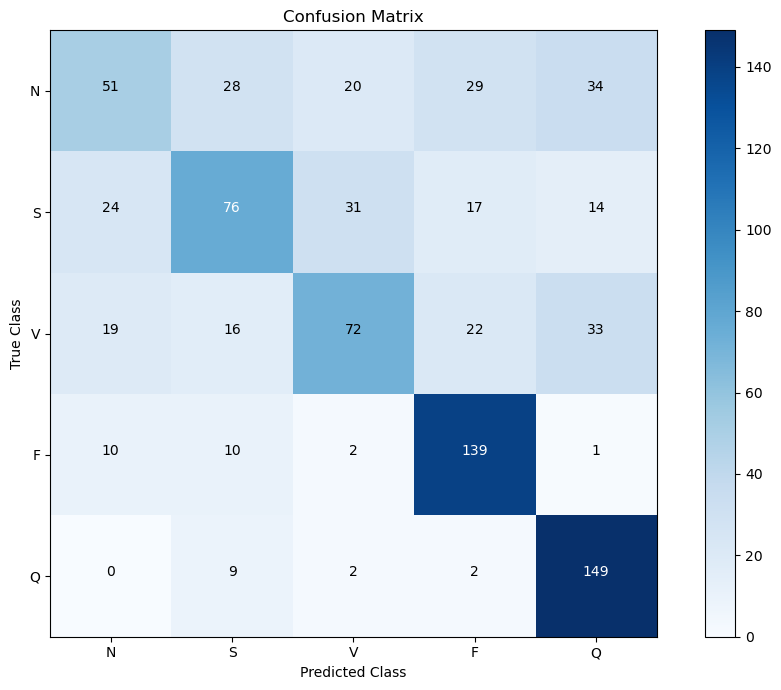

              precision    recall  f1-score   support

           N       0.49      0.31      0.38       162
           S       0.55      0.47      0.50       162
           V       0.57      0.44      0.50       162
           F       0.67      0.86      0.75       162
           Q       0.65      0.92      0.76       162

    accuracy                           0.60       810
   macro avg       0.58      0.60      0.58       810
weighted avg       0.58      0.60      0.58       810

False Negatives for Class S (misclassified as Normal): 24
False Negatives for Class V (misclassified as Normal): 19
False Negatives for Class F (misclassified as Normal): 10
False Negatives for Class Q (misclassified as Normal): 0
Total False Negatives (anomalies classified as Normal): 53

Train Accuracy for C=1: 65.29%
Test Accuracy for C=1: 64.07%


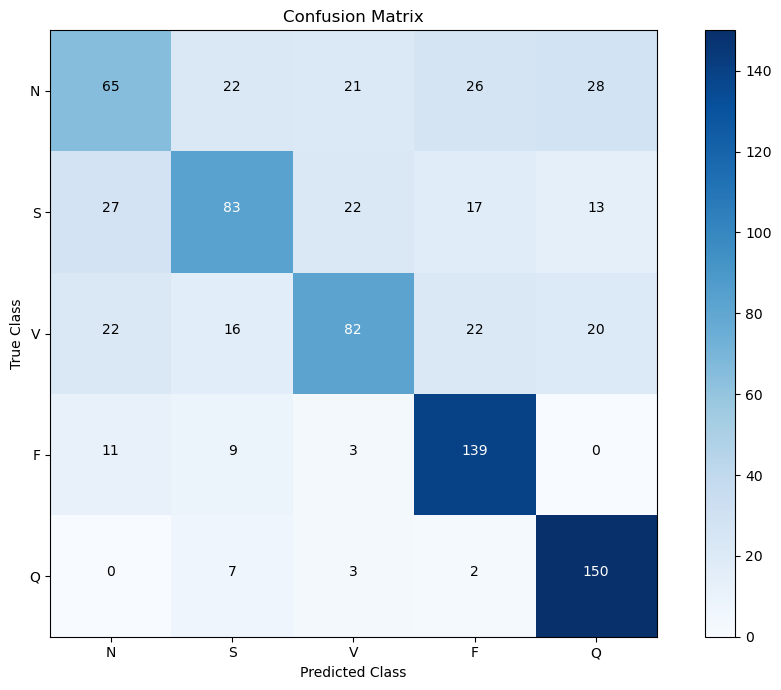

              precision    recall  f1-score   support

           N       0.52      0.40      0.45       162
           S       0.61      0.51      0.56       162
           V       0.63      0.51      0.56       162
           F       0.67      0.86      0.76       162
           Q       0.71      0.93      0.80       162

    accuracy                           0.64       810
   macro avg       0.63      0.64      0.63       810
weighted avg       0.63      0.64      0.63       810

False Negatives for Class S (misclassified as Normal): 27
False Negatives for Class V (misclassified as Normal): 22
False Negatives for Class F (misclassified as Normal): 11
False Negatives for Class Q (misclassified as Normal): 0
Total False Negatives (anomalies classified as Normal): 60

Train Accuracy for C=100: 78.27%
Test Accuracy for C=100: 73.46%


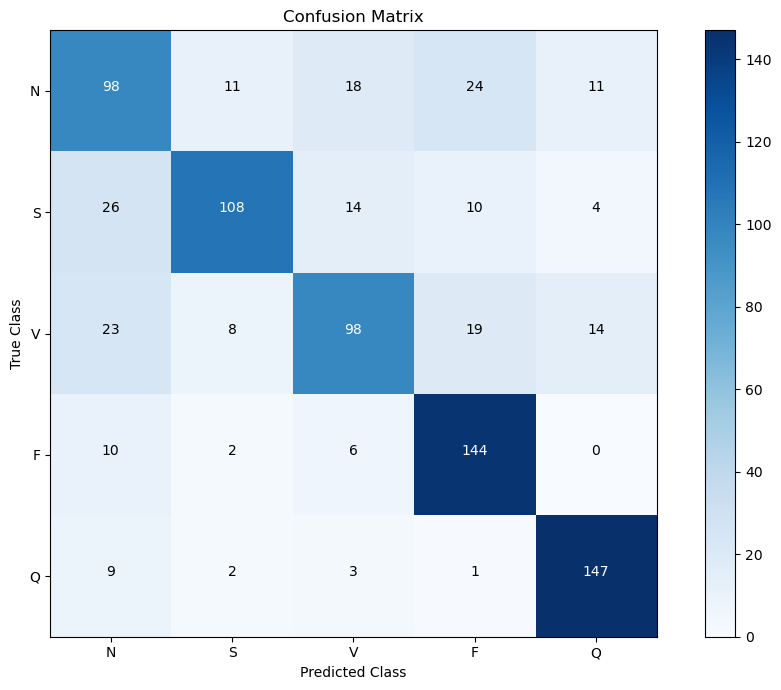

              precision    recall  f1-score   support

           N       0.59      0.60      0.60       162
           S       0.82      0.67      0.74       162
           V       0.71      0.60      0.65       162
           F       0.73      0.89      0.80       162
           Q       0.84      0.91      0.87       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810

False Negatives for Class S (misclassified as Normal): 26
False Negatives for Class V (misclassified as Normal): 23
False Negatives for Class F (misclassified as Normal): 10
False Negatives for Class Q (misclassified as Normal): 9
Total False Negatives (anomalies classified as Normal): 68

Train Accuracy for C=1000: 83.83%
Test Accuracy for C=1000: 75.43%


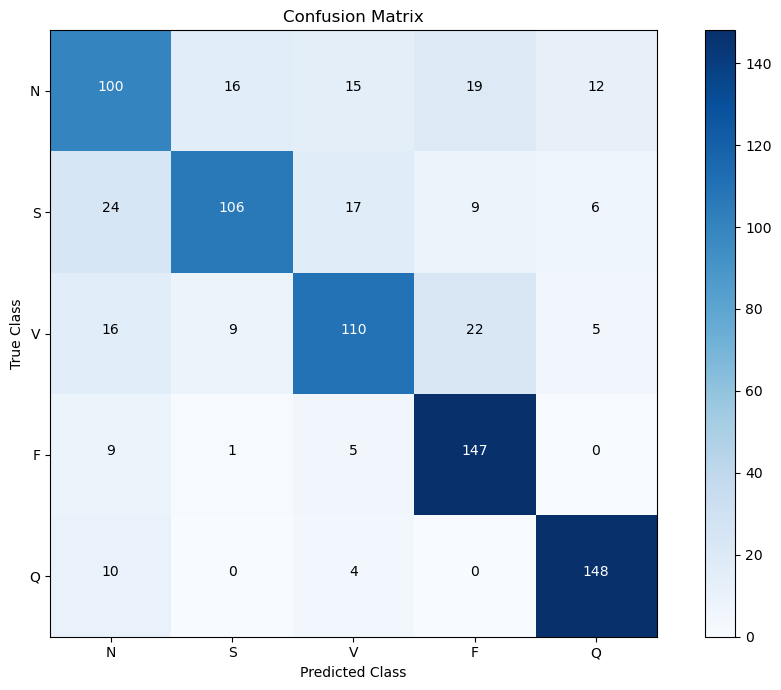

              precision    recall  f1-score   support

           N       0.63      0.62      0.62       162
           S       0.80      0.65      0.72       162
           V       0.73      0.68      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 24
False Negatives for Class V (misclassified as Normal): 16
False Negatives for Class F (misclassified as Normal): 9
False Negatives for Class Q (misclassified as Normal): 10
Total False Negatives (anomalies classified as Normal): 59

Train Accuracy for C=10000: 90.85%
Test Accuracy for C=10000: 75.31%


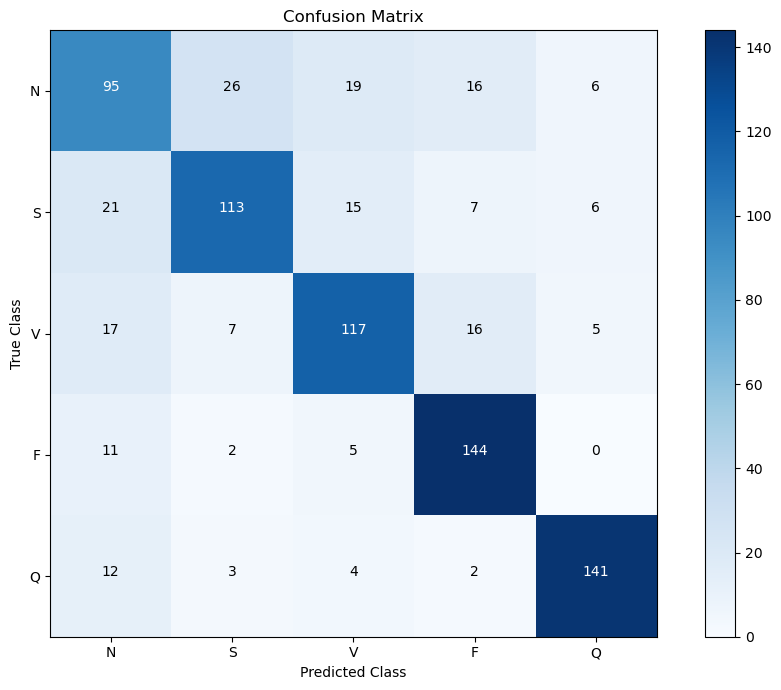

              precision    recall  f1-score   support

           N       0.61      0.59      0.60       162
           S       0.75      0.70      0.72       162
           V       0.73      0.72      0.73       162
           F       0.78      0.89      0.83       162
           Q       0.89      0.87      0.88       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 21
False Negatives for Class V (misclassified as Normal): 17
False Negatives for Class F (misclassified as Normal): 11
False Negatives for Class Q (misclassified as Normal): 12
Total False Negatives (anomalies classified as Normal): 61

Train Accuracy for C=100000: 96.95%
Test Accuracy for C=100000: 72.59%


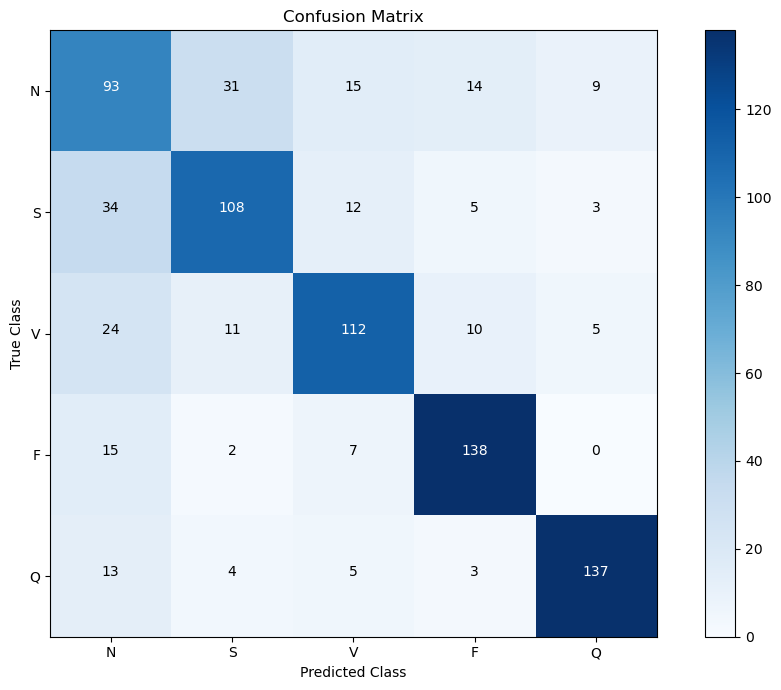

              precision    recall  f1-score   support

           N       0.52      0.57      0.55       162
           S       0.69      0.67      0.68       162
           V       0.74      0.69      0.72       162
           F       0.81      0.85      0.83       162
           Q       0.89      0.85      0.87       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810

False Negatives for Class S (misclassified as Normal): 34
False Negatives for Class V (misclassified as Normal): 24
False Negatives for Class F (misclassified as Normal): 15
False Negatives for Class Q (misclassified as Normal): 13
Total False Negatives (anomalies classified as Normal): 86



In [93]:
C_values = [0.1, 1, 100, 1000, 10000, 100000]

# Inizialitze the arrays containing the values to plot depending on C
accuracy_list_train = []
accuracy_list_test = []
false_negatives = []

for C in C_values:
    
    # Train SVC
    svm_model = SVC(C = C, kernel = kernel)

    # Save the SVC model into a file
    file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}"
    os.makedirs("my_model", exist_ok=True)
    joblib.dump(svm_model, file_name)

    # Train (fit) the model on the train set
    svm_model.fit(train_fvector, labels_train)

    # Print the accuracy on the train set
    train_accuracy = svm_model.score(train_fvector, labels_train) 
    print(f"Train Accuracy for C={C}: {train_accuracy * 100:.2f}%")

    # Save the train accuracy value in an array
    accuracy_list_train.append(round(train_accuracy*100, 2))

    # Make predictions on the test set
    test_predictions = svm_model.predict(test_fvector)

    # Print the accuracy on the test set
    test_accuracy = accuracy_score(labels_test, test_predictions)
    print(f"Test Accuracy for C={C}: {test_accuracy * 100:.2f}%")

    # Save the test accuracy value in an array
    accuracy_list_test.append(round(test_accuracy*100, 2))

    # Plot the confusion matrix
    cm = confusion_matrix(labels_test, test_predictions)
    plot_confusionmatrix(cm)

    # Print the classification report
    report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
    print(report)

    # Print false negatives for each class and the total number of false negatives.
    print_false_negatives(cm)

    # Save the number of total false negatives in an array
    false_negatives.append(sum(cm[1:, 0]))

    # Space between different prints and plots of a certain C
    print()


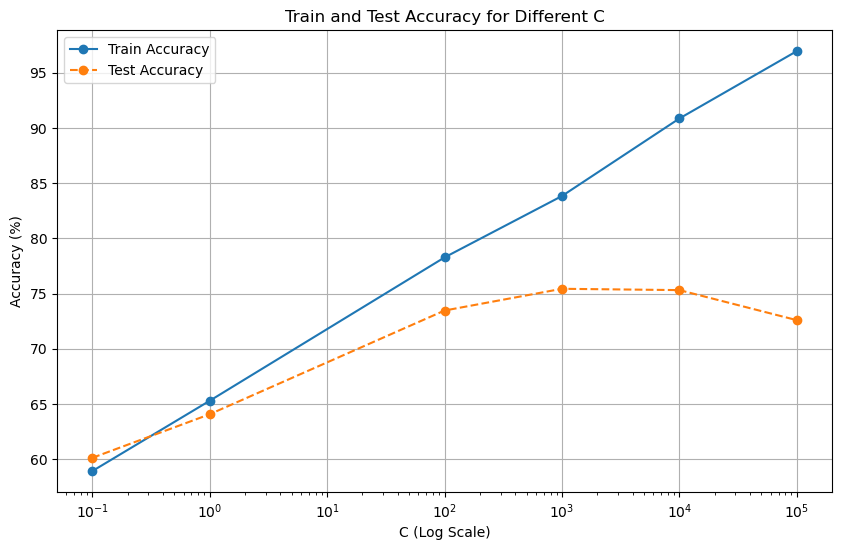

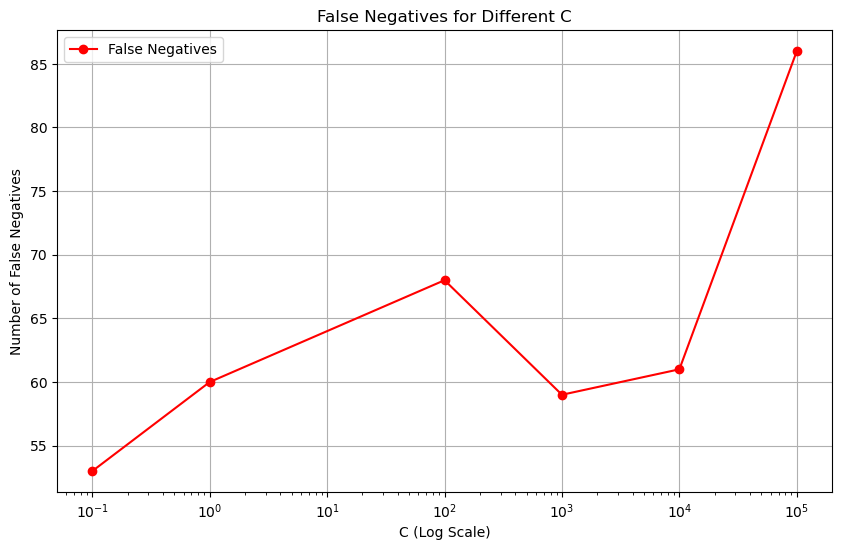

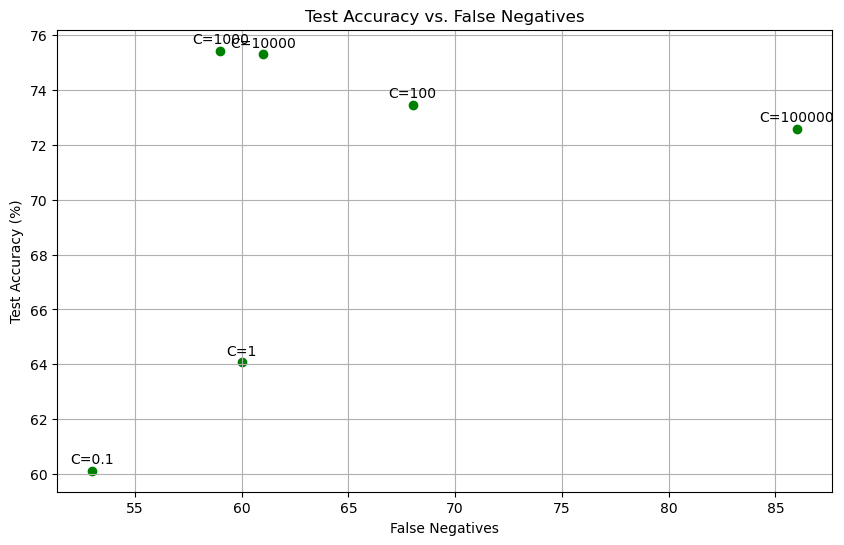

In [94]:
# Plot the accuracy on train and test sets for different values of C
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_list_train, label="Train Accuracy", marker='o')
plt.plot(C_values, accuracy_list_test, label="Test Accuracy", marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy (%)')
plt.title('Train and Test Accuracy for Different C')
plt.legend()
plt.grid(True)
plt.show()

# Plot the false negatives for different values of C
plt.figure(figsize=(10, 6))
plt.plot(C_values, false_negatives, label="False Negatives", marker='o', color='r')
plt.xscale('log')
plt.xlabel('C (Log Scale)')
plt.ylabel('Number of False Negatives')
plt.title('False Negatives for Different C')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot of Test Accuracy vs. False Negatives
plt.figure(figsize=(10, 6))
plt.scatter(false_negatives, accuracy_list_test, color='g', marker='o')
for i, txt in enumerate(C_values):
    plt.annotate(f'C={txt}', (false_negatives[i], accuracy_list_test[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.xlabel('False Negatives')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs. False Negatives')
plt.grid(True)
plt.show()

* Now, you can vary all the hyperparameters (kernel, C, N, H, etc.). Which is the best-performing kernel? Can you explain why?

Print and plot everything, and provide comments in the report. How does your best model perform on the test set? Why do we have different performance with this new dataset with respect to the previous one? Comment on the confusion matrix. Can you identify biases of the classifier toward precise classes? Can you think of methods for improving the classification and, in particular, the metrics you selected?

Train Accuracy for rbf kernel and C=1000: 83.83%
Test Accuracy for rbf kernel and C=1000: 75.43%


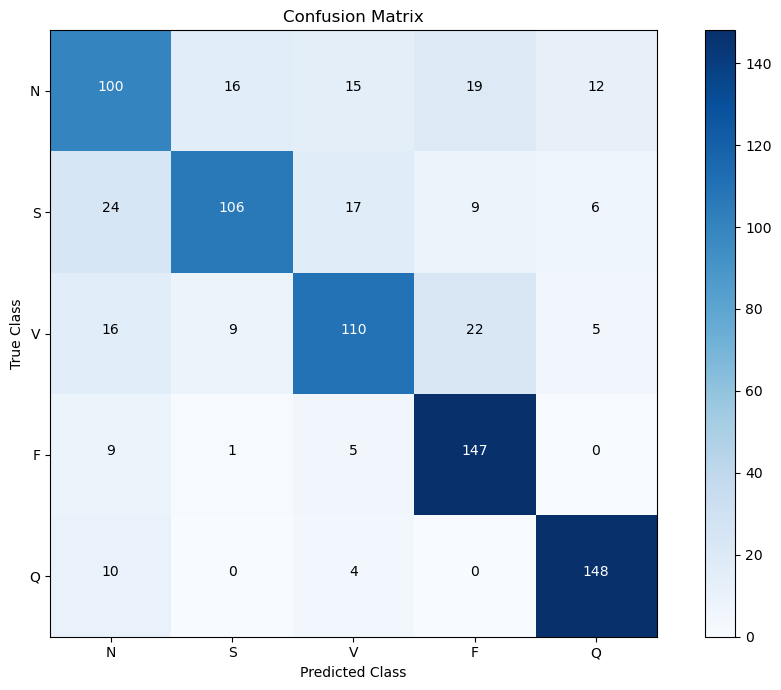

              precision    recall  f1-score   support

           N       0.63      0.62      0.62       162
           S       0.80      0.65      0.72       162
           V       0.73      0.68      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 24
False Negatives for Class V (misclassified as Normal): 16
False Negatives for Class F (misclassified as Normal): 9
False Negatives for Class Q (misclassified as Normal): 10
Total False Negatives (anomalies classified as Normal): 59

Train Accuracy for linear kernel and C=1000: 68.58%
Test Accuracy for linear kernel and C=1000: 66.54%


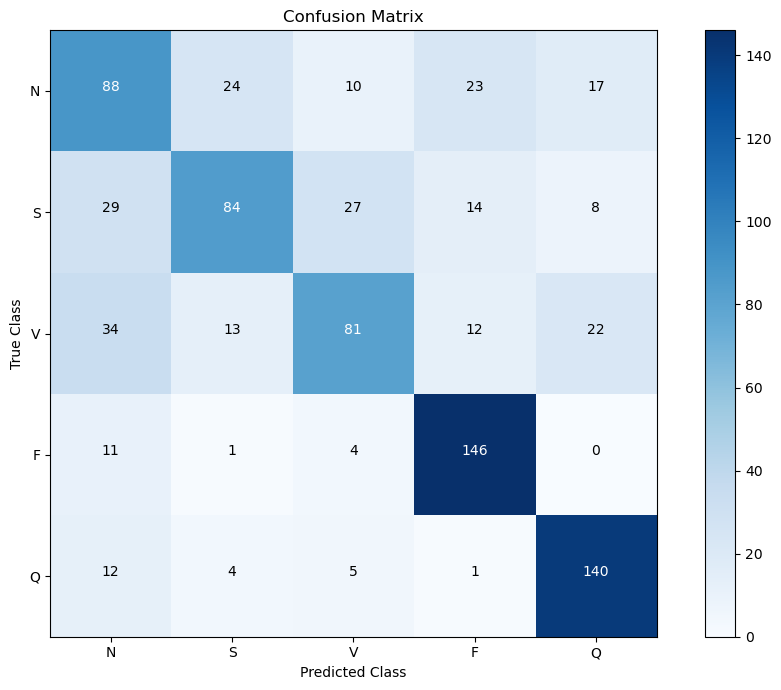

              precision    recall  f1-score   support

           N       0.51      0.54      0.52       162
           S       0.67      0.52      0.58       162
           V       0.64      0.50      0.56       162
           F       0.74      0.90      0.82       162
           Q       0.75      0.86      0.80       162

    accuracy                           0.67       810
   macro avg       0.66      0.67      0.66       810
weighted avg       0.66      0.67      0.66       810

False Negatives for Class S (misclassified as Normal): 29
False Negatives for Class V (misclassified as Normal): 34
False Negatives for Class F (misclassified as Normal): 11
False Negatives for Class Q (misclassified as Normal): 12
Total False Negatives (anomalies classified as Normal): 86

Train Accuracy for poly kernel and C=1000: 81.27%
Test Accuracy for poly kernel and C=1000: 75.43%


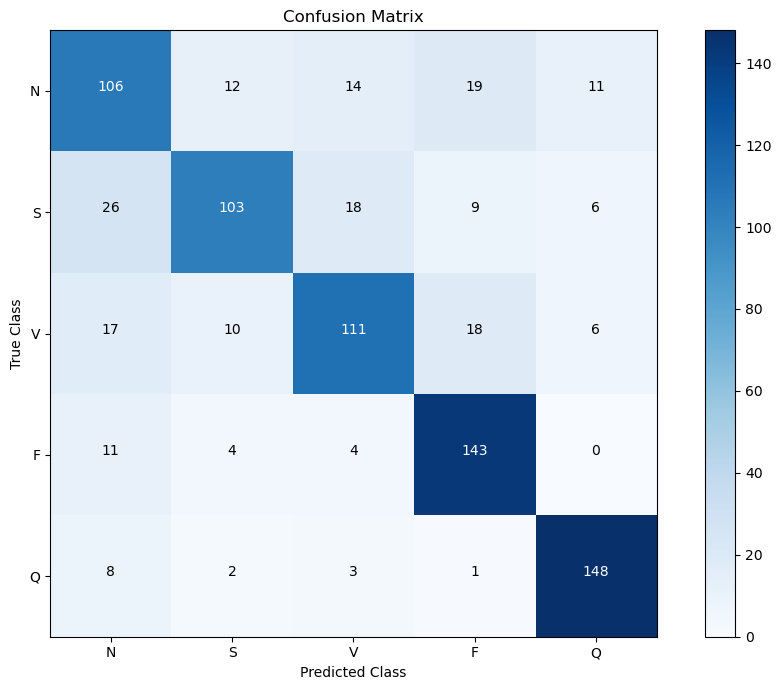

              precision    recall  f1-score   support

           N       0.63      0.65      0.64       162
           S       0.79      0.64      0.70       162
           V       0.74      0.69      0.71       162
           F       0.75      0.88      0.81       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 26
False Negatives for Class V (misclassified as Normal): 17
False Negatives for Class F (misclassified as Normal): 11
False Negatives for Class Q (misclassified as Normal): 8
Total False Negatives (anomalies classified as Normal): 62

Train Accuracy for sigmoid kernel and C=1000: 32.12%
Test Accuracy for sigmoid kernel and C=1000: 28.40%


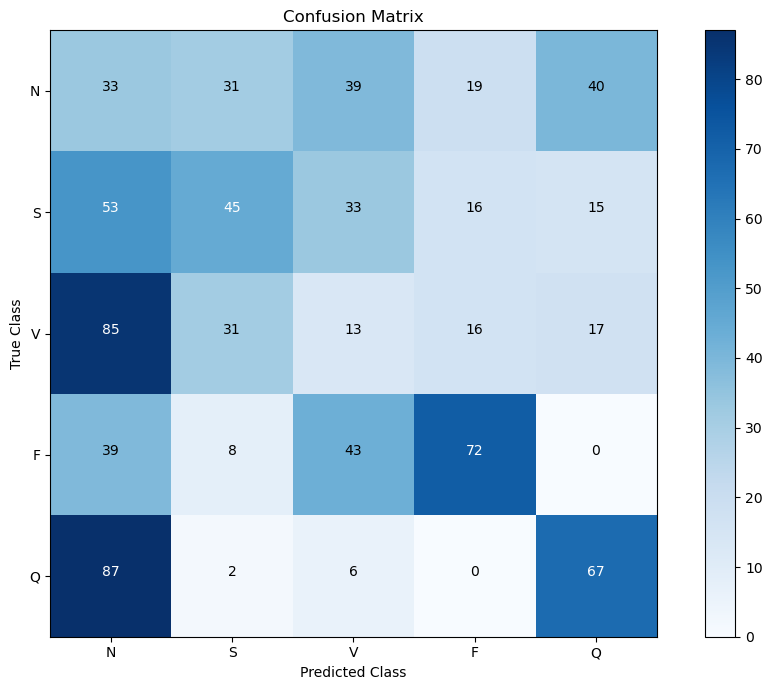

              precision    recall  f1-score   support

           N       0.11      0.20      0.14       162
           S       0.38      0.28      0.32       162
           V       0.10      0.08      0.09       162
           F       0.59      0.44      0.51       162
           Q       0.48      0.41      0.45       162

    accuracy                           0.28       810
   macro avg       0.33      0.28      0.30       810
weighted avg       0.33      0.28      0.30       810

False Negatives for Class S (misclassified as Normal): 53
False Negatives for Class V (misclassified as Normal): 85
False Negatives for Class F (misclassified as Normal): 39
False Negatives for Class Q (misclassified as Normal): 87
Total False Negatives (anomalies classified as Normal): 264



In [95]:
# kernel to test
kernel = ['rbf', 'linear', 'poly', 'sigmoid']

C = 1000

accuracy_list_train = []
accuracy_list_test = []
false_negatives = []

for k in kernel:

    # Train SVC
    svm_model = SVC(C = C, kernel = k)

    # Save the SVC model into a file
    file_name = f"my_model/svc_{k}_C_{C}_N_{N}_H_{H}"
    os.makedirs("my_model", exist_ok=True)
    joblib.dump(svm_model, file_name)

    # Train (fit) the model on the train set
    svm_model.fit(train_fvector, labels_train)

    # Print the accuracy on the train set
    train_accuracy = svm_model.score(train_fvector, labels_train) 
    print(f"Train Accuracy for {k} kernel and C={C}: {train_accuracy * 100:.2f}%")

    # Save the train accuracy value in an array
    accuracy_list_train.append(round(train_accuracy*100, 2))

    # Make predictions on the test set
    test_predictions = svm_model.predict(test_fvector)

    # Print the accuracy on the test set
    test_accuracy = accuracy_score(labels_test, test_predictions)
    print(f"Test Accuracy for {k} kernel and C={C}: {test_accuracy * 100:.2f}%")

    # Save the test accuracy value in an array
    accuracy_list_test.append(round(test_accuracy*100, 2))

    # Plot the confusion matrix
    cm = confusion_matrix(labels_test, test_predictions)
    plot_confusionmatrix(cm)

    # Print the classification report
    report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
    print(report)

    # Print false negatives for each class and the total number of false negatives.
    print_false_negatives(cm)

    # Save the number of total false negatives in an array
    false_negatives.append(sum(cm[1:, 0]))
    
    # Space between different prints and plots of a certain kernel
    print()

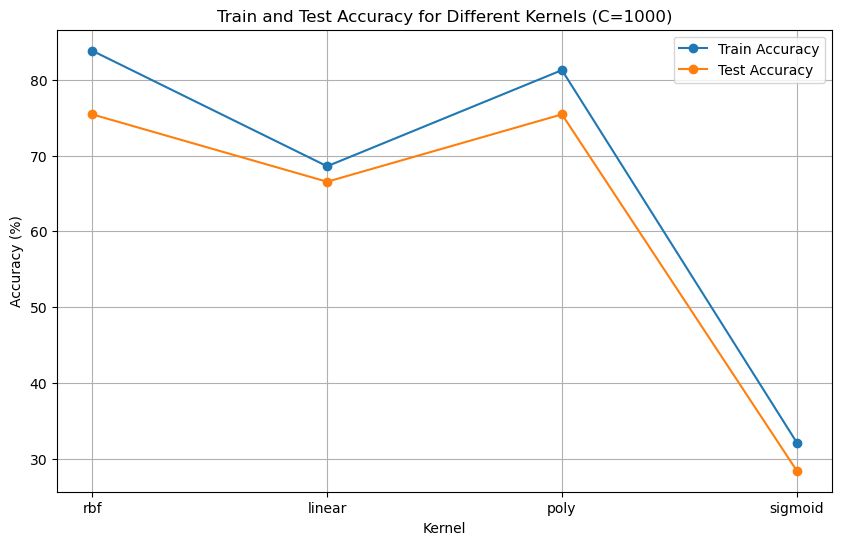

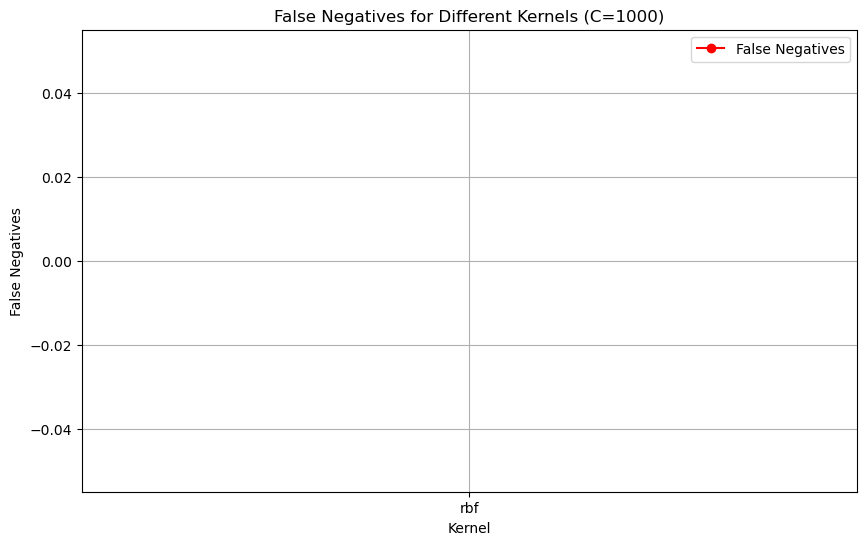

In [96]:
# Plot 1: Test Accuracy and Train Accuracy for different kernels
plt.figure(figsize=(10, 6))
plt.plot(kernel, accuracy_list_train, label="Train Accuracy", marker='o')
plt.plot(kernel, accuracy_list_test, label="Test Accuracy", marker='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy (%)')
plt.title('Train and Test Accuracy for Different Kernels (C=1000)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: False Negatives for different kernels
plt.figure(figsize=(10, 6))
plt.plot(kernel, false_negatives, label="False Negatives", marker='o', color='r')
plt.xlabel('Kernel')
plt.ylabel('False Negatives')
plt.title('False Negatives for Different Kernels (C=1000)')
plt.legend()
plt.grid(True)
plt.show()


Train Accuracy for N=8, kernel=rbf and C=1000: 88.10%
Test Accuracy for N=8, kernel=rbf and C=1000: 66.79%


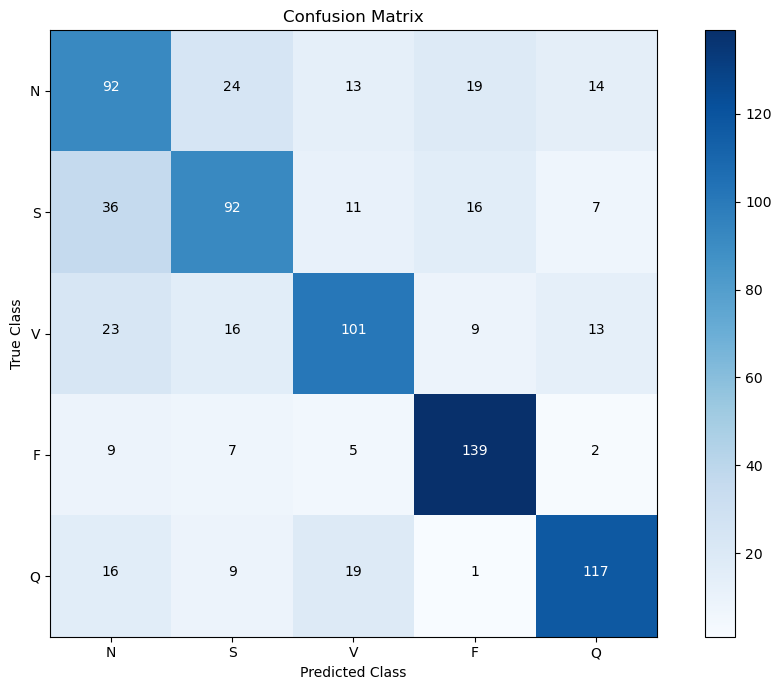

              precision    recall  f1-score   support

           N       0.52      0.57      0.54       162
           S       0.62      0.57      0.59       162
           V       0.68      0.62      0.65       162
           F       0.76      0.86      0.80       162
           Q       0.76      0.72      0.74       162

    accuracy                           0.67       810
   macro avg       0.67      0.67      0.67       810
weighted avg       0.67      0.67      0.67       810

False Negatives for Class S (misclassified as Normal): 36
False Negatives for Class V (misclassified as Normal): 23
False Negatives for Class F (misclassified as Normal): 9
False Negatives for Class Q (misclassified as Normal): 16
Total False Negatives (anomalies classified as Normal): 84

Train Accuracy for N=16, kernel=rbf and C=1000: 84.97%
Test Accuracy for N=16, kernel=rbf and C=1000: 70.49%


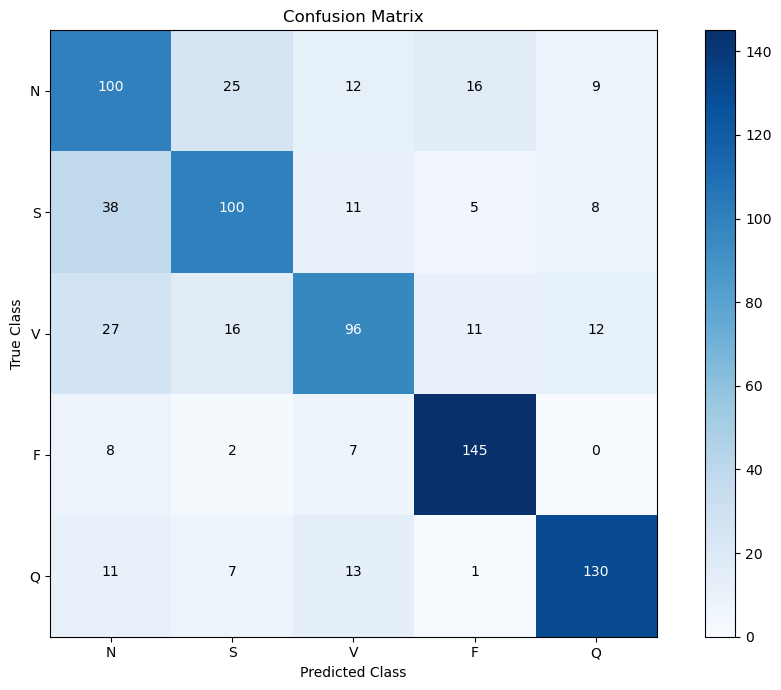

              precision    recall  f1-score   support

           N       0.54      0.62      0.58       162
           S       0.67      0.62      0.64       162
           V       0.69      0.59      0.64       162
           F       0.81      0.90      0.85       162
           Q       0.82      0.80      0.81       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810

False Negatives for Class S (misclassified as Normal): 38
False Negatives for Class V (misclassified as Normal): 27
False Negatives for Class F (misclassified as Normal): 8
False Negatives for Class Q (misclassified as Normal): 11
Total False Negatives (anomalies classified as Normal): 84

Train Accuracy for N=32, kernel=rbf and C=1000: 85.59%
Test Accuracy for N=32, kernel=rbf and C=1000: 75.43%


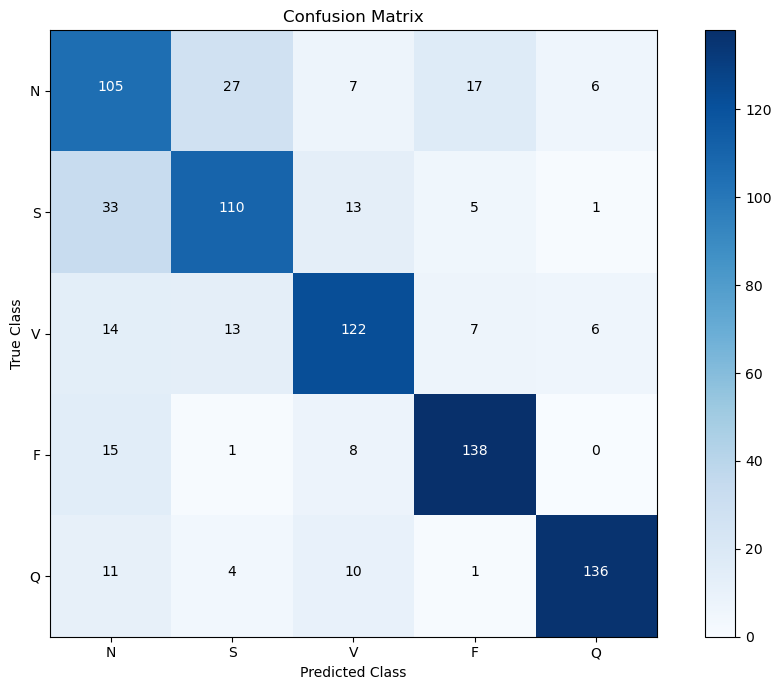

              precision    recall  f1-score   support

           N       0.59      0.65      0.62       162
           S       0.71      0.68      0.69       162
           V       0.76      0.75      0.76       162
           F       0.82      0.85      0.84       162
           Q       0.91      0.84      0.87       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.76       810
weighted avg       0.76      0.75      0.76       810

False Negatives for Class S (misclassified as Normal): 33
False Negatives for Class V (misclassified as Normal): 14
False Negatives for Class F (misclassified as Normal): 15
False Negatives for Class Q (misclassified as Normal): 11
Total False Negatives (anomalies classified as Normal): 73

Train Accuracy for N=64, kernel=rbf and C=1000: 83.83%
Test Accuracy for N=64, kernel=rbf and C=1000: 75.43%


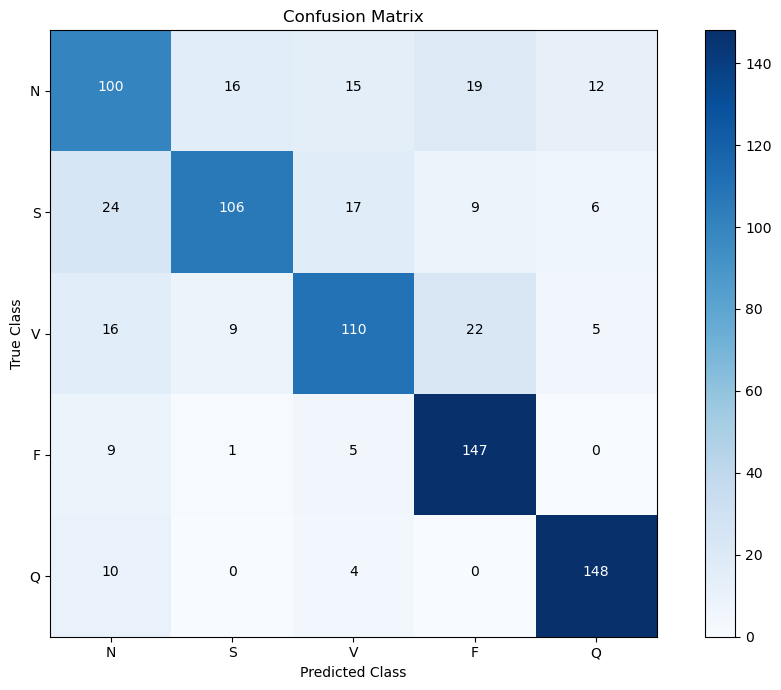

              precision    recall  f1-score   support

           N       0.63      0.62      0.62       162
           S       0.80      0.65      0.72       162
           V       0.73      0.68      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 24
False Negatives for Class V (misclassified as Normal): 16
False Negatives for Class F (misclassified as Normal): 9
False Negatives for Class Q (misclassified as Normal): 10
Total False Negatives (anomalies classified as Normal): 59



In [97]:
# values N to test
N_vector = [8, 16, 32, 64]

kernel = 'rbf'

C = 1000

accuracy_list_train = []
accuracy_list_test = []
false_negatives = []

for n in N_vector:
    
    # Compute train feature vector
    first, last = 0, len(train_set) 
    train_fvector= []
    for idx in range(first, last):
        first_waveform = train_set[idx] 
        train_fvector.append(compute_feature_vector(first_waveform, Fs=Fs, N=n))

    # Copmute test feature vecture
    first, last = 0, len(test_set) 
    test_fvector= []
    for idx in range(first, last):
        first_waveform = test_set[idx]  
        test_fvector.append(compute_feature_vector(first_waveform, Fs=Fs, N=n))

    # Train SVC
    svm_model = SVC(C = C, kernel = kernel)

    # Save the SVC model into a file
    file_name = f"my_model/svc_{kernel}_C_{C}_N_{n}_H_{H}"
    os.makedirs("my_model", exist_ok=True)
    joblib.dump(svm_model, file_name)

    # Train (fit) the model on the train set
    svm_model.fit(train_fvector, labels_train)

    # Print the accuracy on the train set
    train_accuracy = svm_model.score(train_fvector, labels_train) 
    print(f"Train Accuracy for N={n}, kernel={kernel} and C={C}: {train_accuracy * 100:.2f}%")

    # Save the train accuracy value in an array
    accuracy_list_train.append(round(train_accuracy*100, 2))

    # Make predictions on the test set
    test_predictions = svm_model.predict(test_fvector)

    # Print the accuracy on the test set
    test_accuracy = accuracy_score(labels_test, test_predictions)
    print(f"Test Accuracy for N={n}, kernel={kernel} and C={C}: {test_accuracy * 100:.2f}%")

    # Save the test accuracy value in an array
    accuracy_list_test.append(round(test_accuracy*100, 2))

    # Plot the confusion matrix
    cm = confusion_matrix(labels_test, test_predictions)
    plot_confusionmatrix(cm)

    # Print the classification report
    report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
    print(report)

    # Print false negatives for each class and the total number of false negatives.
    print_false_negatives(cm)

    # Save the number of total false negatives in an array
    false_negatives.append(sum(cm[1:, 0]))
    
    # Space between different prints and plots of a certain C
    print()



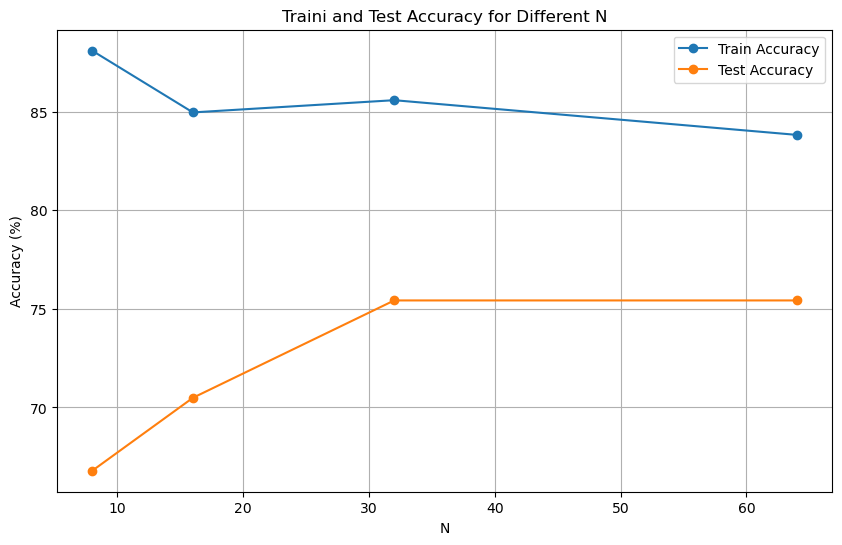

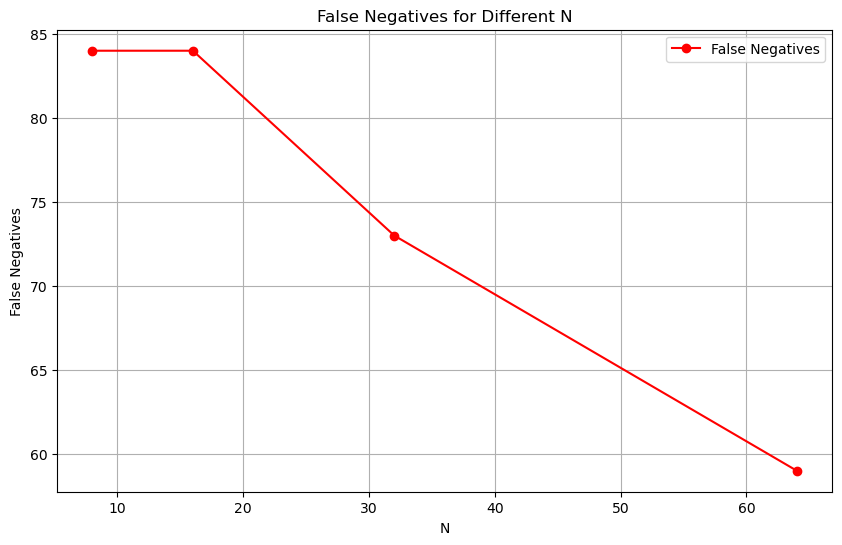

In [98]:

# Plot 1: Test Accuracy and Train Accuracy for different values of N
plt.figure(figsize=(10, 6))
plt.plot(N_vector, accuracy_list_train, label="Train Accuracy", marker='o')
plt.plot(N_vector, accuracy_list_test, label="Test Accuracy", marker='o')
plt.xlabel('N')
plt.ylabel('Accuracy (%)')
plt.title('Traini and Test Accuracy for Different N')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

# Plot 2: False Negatives for different values of N
plt.figure(figsize=(10, 6))
plt.plot(N_vector, false_negatives, label="False Negatives", marker='o', color='r')
plt.xlabel('N')
plt.ylabel('False Negatives')
plt.title('False Negatives for Different N')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

Train Accuracy for H=4, N=64, kernel=rbf and C=1000: 97.57%
Test Accuracy for H=4, N=64, kernel=rbf and C=1000: 71.60%


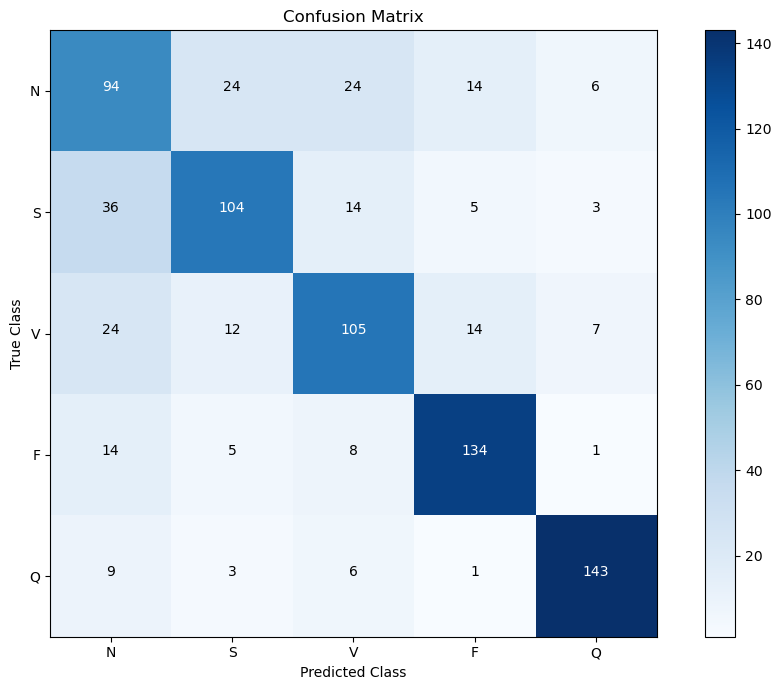

              precision    recall  f1-score   support

           N       0.53      0.58      0.55       162
           S       0.70      0.64      0.67       162
           V       0.67      0.65      0.66       162
           F       0.80      0.83      0.81       162
           Q       0.89      0.88      0.89       162

    accuracy                           0.72       810
   macro avg       0.72      0.72      0.72       810
weighted avg       0.72      0.72      0.72       810

False Negatives for Class S (misclassified as Normal): 36
False Negatives for Class V (misclassified as Normal): 24
False Negatives for Class F (misclassified as Normal): 14
False Negatives for Class Q (misclassified as Normal): 9
Total False Negatives (anomalies classified as Normal): 83

Train Accuracy for H=8, N=64, kernel=rbf and C=1000: 92.66%
Test Accuracy for H=8, N=64, kernel=rbf and C=1000: 73.83%


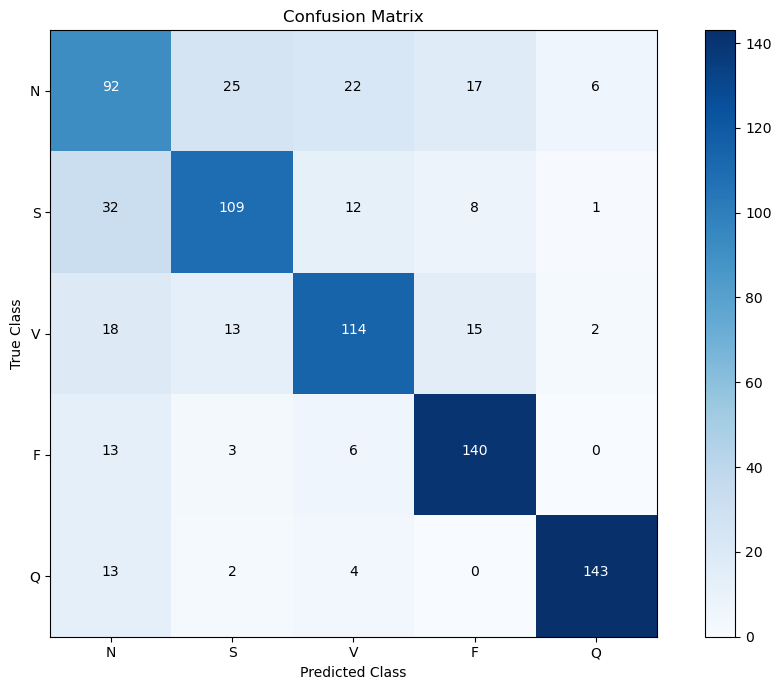

              precision    recall  f1-score   support

           N       0.55      0.57      0.56       162
           S       0.72      0.67      0.69       162
           V       0.72      0.70      0.71       162
           F       0.78      0.86      0.82       162
           Q       0.94      0.88      0.91       162

    accuracy                           0.74       810
   macro avg       0.74      0.74      0.74       810
weighted avg       0.74      0.74      0.74       810

False Negatives for Class S (misclassified as Normal): 32
False Negatives for Class V (misclassified as Normal): 18
False Negatives for Class F (misclassified as Normal): 13
False Negatives for Class Q (misclassified as Normal): 13
Total False Negatives (anomalies classified as Normal): 76

Train Accuracy for H=16, N=64, kernel=rbf and C=1000: 83.83%
Test Accuracy for H=16, N=64, kernel=rbf and C=1000: 75.43%


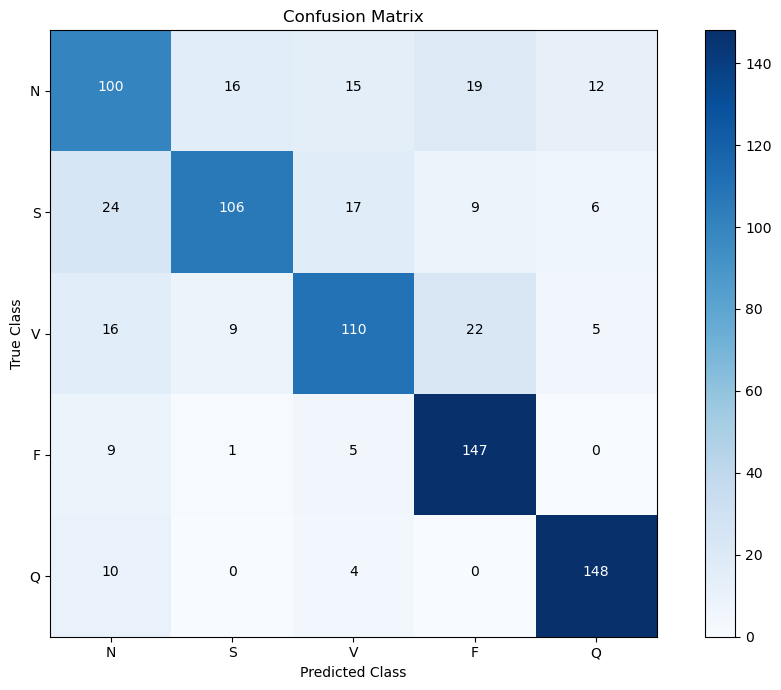

              precision    recall  f1-score   support

           N       0.63      0.62      0.62       162
           S       0.80      0.65      0.72       162
           V       0.73      0.68      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 24
False Negatives for Class V (misclassified as Normal): 16
False Negatives for Class F (misclassified as Normal): 9
False Negatives for Class Q (misclassified as Normal): 10
Total False Negatives (anomalies classified as Normal): 59

Train Accuracy for H=32, N=64, kernel=rbf and C=1000: 67.94%
Test Accuracy for H=32, N=64, kernel=rbf and C=1000: 64.94%


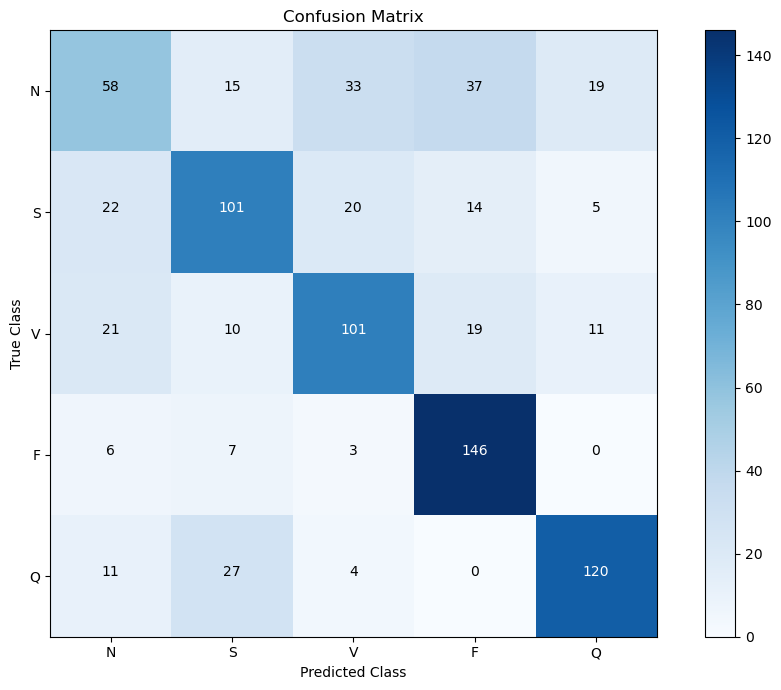

              precision    recall  f1-score   support

           N       0.49      0.36      0.41       162
           S       0.63      0.62      0.63       162
           V       0.63      0.62      0.63       162
           F       0.68      0.90      0.77       162
           Q       0.77      0.74      0.76       162

    accuracy                           0.65       810
   macro avg       0.64      0.65      0.64       810
weighted avg       0.64      0.65      0.64       810

False Negatives for Class S (misclassified as Normal): 22
False Negatives for Class V (misclassified as Normal): 21
False Negatives for Class F (misclassified as Normal): 6
False Negatives for Class Q (misclassified as Normal): 11
Total False Negatives (anomalies classified as Normal): 60

Train Accuracy for H=64, N=64, kernel=rbf and C=1000: 63.43%
Test Accuracy for H=64, N=64, kernel=rbf and C=1000: 63.46%


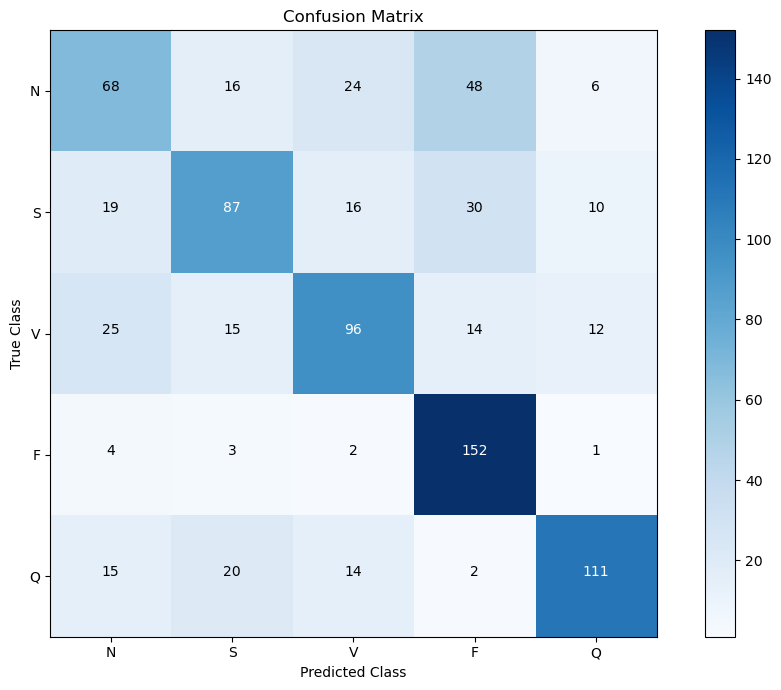

              precision    recall  f1-score   support

           N       0.52      0.42      0.46       162
           S       0.62      0.54      0.57       162
           V       0.63      0.59      0.61       162
           F       0.62      0.94      0.75       162
           Q       0.79      0.69      0.74       162

    accuracy                           0.63       810
   macro avg       0.64      0.63      0.63       810
weighted avg       0.64      0.63      0.63       810

False Negatives for Class S (misclassified as Normal): 19
False Negatives for Class V (misclassified as Normal): 25
False Negatives for Class F (misclassified as Normal): 4
False Negatives for Class Q (misclassified as Normal): 15
Total False Negatives (anomalies classified as Normal): 63

Train Accuracy for H=128, N=64, kernel=rbf and C=1000: 60.22%
Test Accuracy for H=128, N=64, kernel=rbf and C=1000: 60.37%


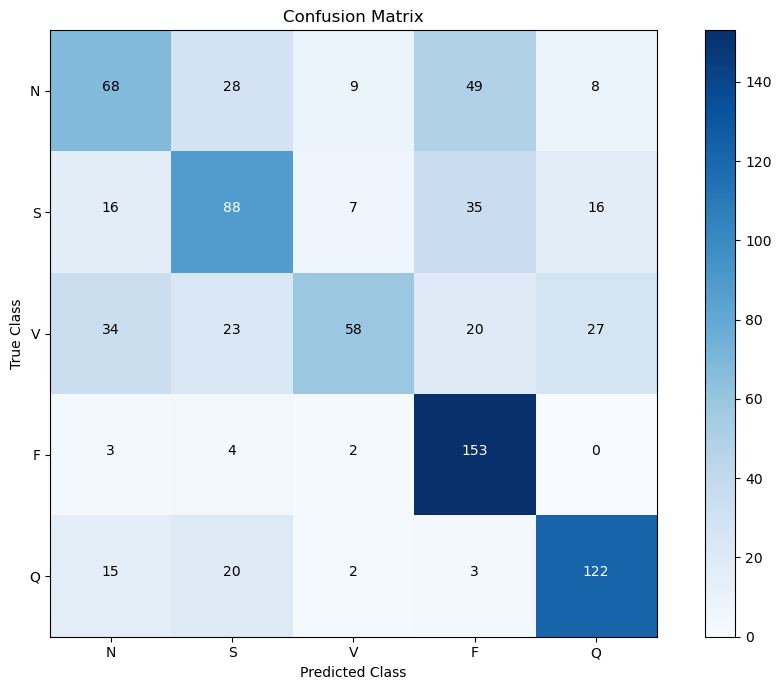

              precision    recall  f1-score   support

           N       0.50      0.42      0.46       162
           S       0.54      0.54      0.54       162
           V       0.74      0.36      0.48       162
           F       0.59      0.94      0.73       162
           Q       0.71      0.75      0.73       162

    accuracy                           0.60       810
   macro avg       0.62      0.60      0.59       810
weighted avg       0.62      0.60      0.59       810

False Negatives for Class S (misclassified as Normal): 16
False Negatives for Class V (misclassified as Normal): 34
False Negatives for Class F (misclassified as Normal): 3
False Negatives for Class Q (misclassified as Normal): 15
Total False Negatives (anomalies classified as Normal): 68



In [99]:
# values of H to test
H_vector = [4, 8, 16, 32, 64, 128]

kernel = 'rbf'

C = 1000

N = 64

accuracy_list_train = []
accuracy_list_test = []
false_negatives = []

for h in H_vector:
    # Compute train feature vector
    first, last = 0, len(train_set) 
    train_fvector= []
    for idx in range(first, last):
        first_waveform = train_set[idx]  # Replace with actual waveform data if necessary
        train_fvector.append(compute_feature_vector(first_waveform, Fs=Fs, N=N, H=h))

    # Compute test feature vector
    first, last = 0, len(test_set) 
    test_fvector= []
    for idx in range(first, last):
        first_waveform = test_set[idx]  # Replace with actual waveform data if necessary
        test_fvector.append(compute_feature_vector(first_waveform, Fs=Fs, N=N, H=h))

     # Train SVC
    svm_model = SVC(C = C, kernel = kernel)

    # Save the SVC model into a file
    file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{h}"
    os.makedirs("my_model", exist_ok=True)
    joblib.dump(svm_model, file_name)

    # Train (fit) the model on the train set
    svm_model.fit(train_fvector, labels_train)

    # Print the accuracy on the train set
    train_accuracy = svm_model.score(train_fvector, labels_train) 
    print(f"Train Accuracy for H={h}, N={N}, kernel={kernel} and C={C}: {train_accuracy * 100:.2f}%")

    # Save the train accuracy value in an array
    accuracy_list_train.append(round(train_accuracy*100, 2))

    # Make predictions on the test set
    test_predictions = svm_model.predict(test_fvector)

    # Print the accuracy on the test set
    test_accuracy = accuracy_score(labels_test, test_predictions)
    print(f"Test Accuracy for H={h}, N={N}, kernel={kernel} and C={C}: {test_accuracy * 100:.2f}%")

    # Save the test accuracy value in an array
    accuracy_list_test.append(round(test_accuracy*100, 2))

    # Plot the confusion matrix
    cm = confusion_matrix(labels_test, test_predictions)
    plot_confusionmatrix(cm)

    # Print the classification report
    report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
    print(report)

    # Print false negatives for each class and the total number of false negatives.
    print_false_negatives(cm)

    # Save the number of total false negatives in an array
    false_negatives.append(sum(cm[1:, 0]))

    # Space between different prints and plots of a certain C
    print()
 

        

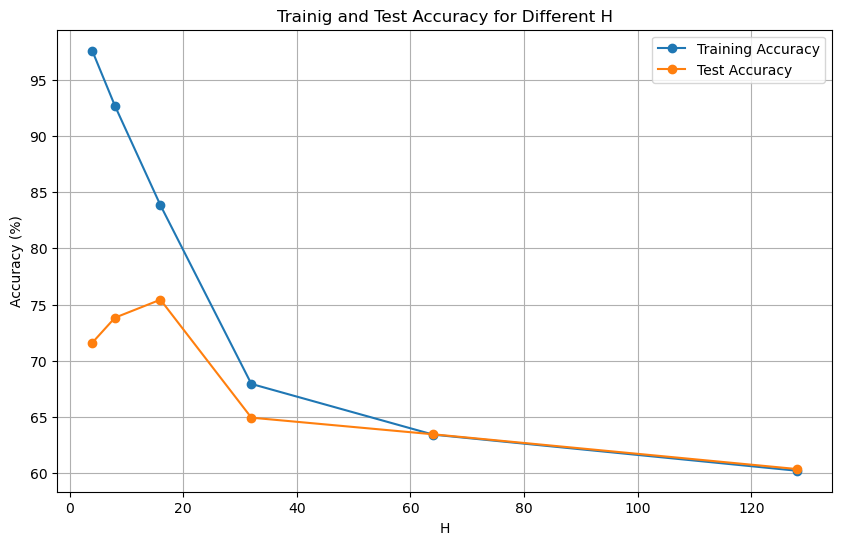

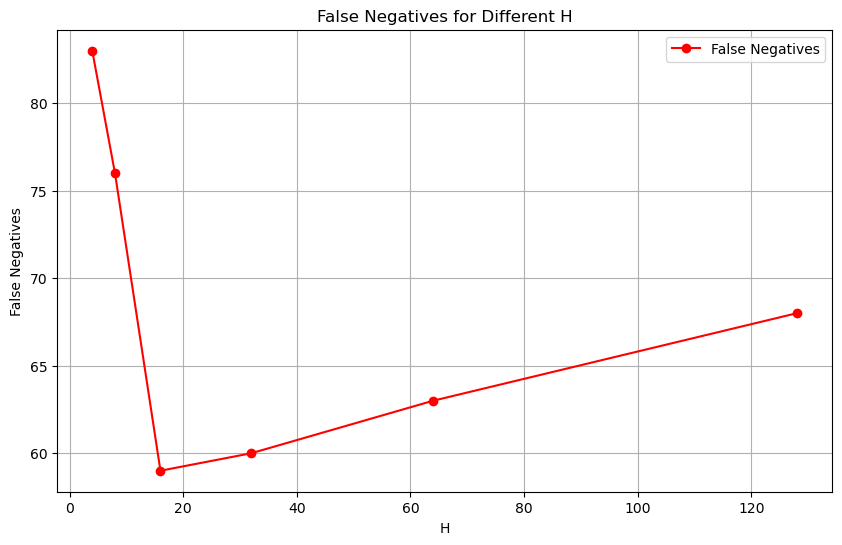

In [100]:
# Plot 1: Test Accuracy and Train Accuracy for different values of H
plt.figure(figsize=(10, 6))
plt.plot(H_vector, accuracy_list_train, label="Training Accuracy", marker='o')
plt.plot(H_vector, accuracy_list_test, label="Test Accuracy", marker='o')
plt.xlabel('H')
plt.ylabel('Accuracy (%)')
plt.title('Trainig and Test Accuracy for Different H')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: False Negatives for different values of H
plt.figure(figsize=(10, 6))
plt.plot(H_vector, false_negatives, label="False Negatives", marker='o', color='r')
plt.xlabel('H')
plt.ylabel('False Negatives')
plt.title('False Negatives for Different H')
plt.legend()
plt.grid(True)
plt.show()

Train Accuracy for Fs= 200, H=16, N=64, kernel=rbf and C=1000: 77.60%
Test Accuracy for Fs= 200, H=16, N=64, kernel=rbf and C=1000: 73.46%


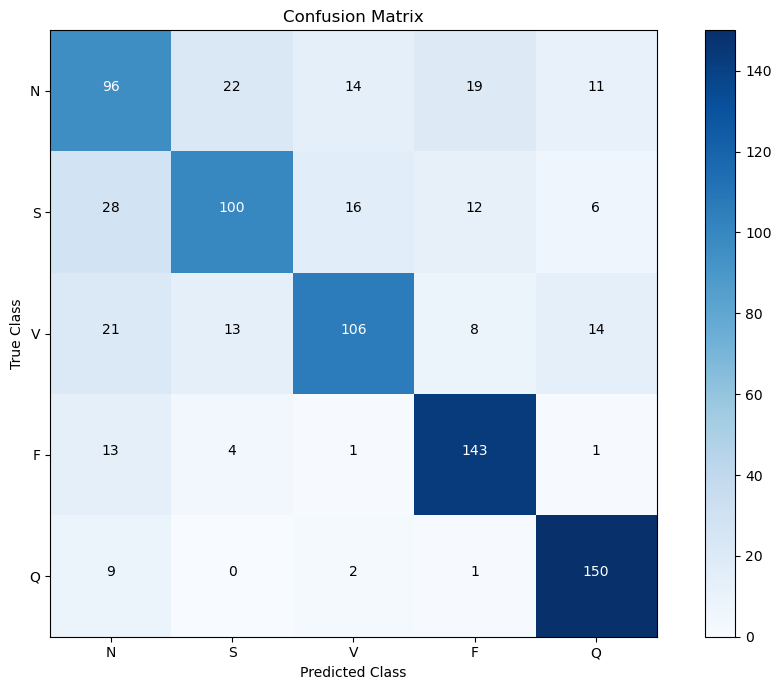

              precision    recall  f1-score   support

           N       0.57      0.59      0.58       162
           S       0.72      0.62      0.66       162
           V       0.76      0.65      0.70       162
           F       0.78      0.88      0.83       162
           Q       0.82      0.93      0.87       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810

False Negatives for Class S (misclassified as Normal): 28
False Negatives for Class V (misclassified as Normal): 21
False Negatives for Class F (misclassified as Normal): 13
False Negatives for Class Q (misclassified as Normal): 9
Total False Negatives (anomalies classified as Normal): 71

Train Accuracy for Fs= 360, H=16, N=64, kernel=rbf and C=1000: 83.83%
Test Accuracy for Fs= 360, H=16, N=64, kernel=rbf and C=1000: 75.43%


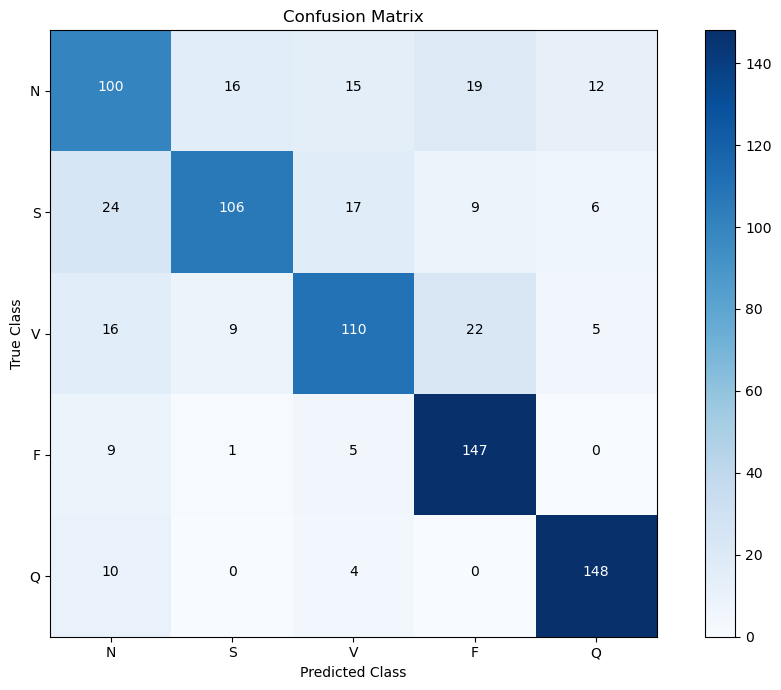

              precision    recall  f1-score   support

           N       0.63      0.62      0.62       162
           S       0.80      0.65      0.72       162
           V       0.73      0.68      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 24
False Negatives for Class V (misclassified as Normal): 16
False Negatives for Class F (misclassified as Normal): 9
False Negatives for Class Q (misclassified as Normal): 10
Total False Negatives (anomalies classified as Normal): 59

Train Accuracy for Fs= 500, H=16, N=64, kernel=rbf and C=1000: 92.79%
Test Accuracy for Fs= 500, H=16, N=64, kernel=rbf and C=1000: 77.53%


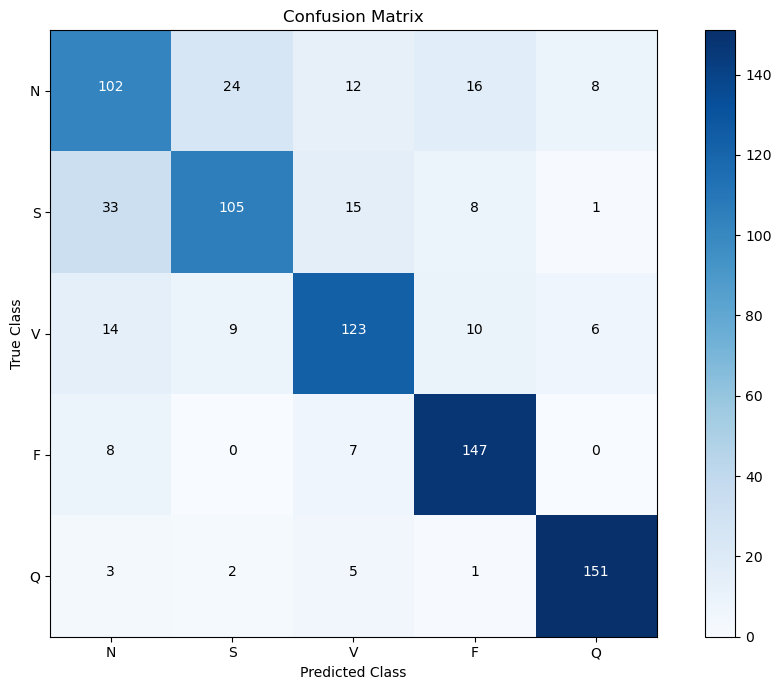

              precision    recall  f1-score   support

           N       0.64      0.63      0.63       162
           S       0.75      0.65      0.70       162
           V       0.76      0.76      0.76       162
           F       0.81      0.91      0.85       162
           Q       0.91      0.93      0.92       162

    accuracy                           0.78       810
   macro avg       0.77      0.78      0.77       810
weighted avg       0.77      0.78      0.77       810

False Negatives for Class S (misclassified as Normal): 33
False Negatives for Class V (misclassified as Normal): 14
False Negatives for Class F (misclassified as Normal): 8
False Negatives for Class Q (misclassified as Normal): 3
Total False Negatives (anomalies classified as Normal): 58

Train Accuracy for Fs= 1000, H=16, N=64, kernel=rbf and C=1000: 99.33%
Test Accuracy for Fs= 1000, H=16, N=64, kernel=rbf and C=1000: 74.69%


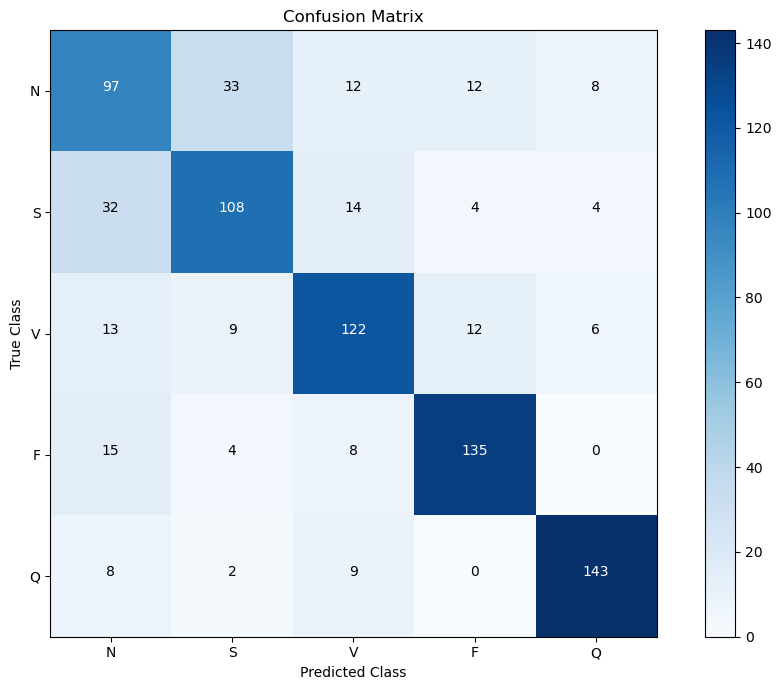

              precision    recall  f1-score   support

           N       0.59      0.60      0.59       162
           S       0.69      0.67      0.68       162
           V       0.74      0.75      0.75       162
           F       0.83      0.83      0.83       162
           Q       0.89      0.88      0.89       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810

False Negatives for Class S (misclassified as Normal): 32
False Negatives for Class V (misclassified as Normal): 13
False Negatives for Class F (misclassified as Normal): 15
False Negatives for Class Q (misclassified as Normal): 8
Total False Negatives (anomalies classified as Normal): 68



In [101]:
# values of H to test
Fs_vector = [200, 360, 500, 1000]

H = 16

kernel = 'rbf'

C = 1000

N = 64

accuracy_list_train = []
accuracy_list_test = []
false_negatives = []

for fs in Fs_vector:
    # Compute train feature vector
    first, last = 0, len(train_set) 
    train_fvector= []
    for idx in range(len(train_set)):
        x = train_set[idx] 
        x_resampled = librosa.resample(x, orig_sr=360, target_sr=fs)  # Resampling the signal, otherwise it will be always set at 360
        train_fvector.append(compute_feature_vector(x_resampled, Fs=fs, N=N, H=H))
    
    test_fvector = []
    for idx in range(len(test_set)):
        x = test_set[idx]  
        x_resampled = librosa.resample(x, orig_sr=360, target_sr=fs)  # Resampling
        test_fvector.append(compute_feature_vector(x_resampled, Fs=fs, N=N, H=H))

     # Train SVC
    svm_model = SVC(C = C, kernel = kernel)

    # Save the SVC model into a file
    file_name = f"my_model/svc_{kernel}_C_{C}_N_{N}_H_{H}_Fs_{fs}" 
    os.makedirs("my_model", exist_ok=True)
    joblib.dump(svm_model, file_name)

    # Train (fit) the model on the train set
    svm_model.fit(train_fvector, labels_train)

    # Print the accuracy on the train set
    train_accuracy = svm_model.score(train_fvector, labels_train) 
    print(f"Train Accuracy for Fs= {fs}, H={H}, N={N}, kernel={kernel} and C={C}: {train_accuracy * 100:.2f}%")

    # Save the train accuracy value in an array
    accuracy_list_train.append(round(train_accuracy*100, 2))

    # Make predictions on the test set
    test_predictions = svm_model.predict(test_fvector)

    # Print the accuracy on the test set
    test_accuracy = accuracy_score(labels_test, test_predictions)
    print(f"Test Accuracy for Fs= {fs}, H={H}, N={N}, kernel={kernel} and C={C}: {test_accuracy * 100:.2f}%")

    # Save the test accuracy value in an array
    accuracy_list_test.append(round(test_accuracy*100, 2))

    # Plot the confusion matrix
    cm = confusion_matrix(labels_test, test_predictions)
    plot_confusionmatrix(cm)

    # Print the classification report
    report = classification_report(labels_test, test_predictions, target_names=list(label_names.values()), zero_division= False)
    print(report)

    # Print false negatives for each class and the total number of false negatives.
    print_false_negatives(cm)

    # Save the number of total false negatives in an array
    false_negatives.append(sum(cm[1:, 0]))

    # Space between different prints and plots of a certain C
    print()
 


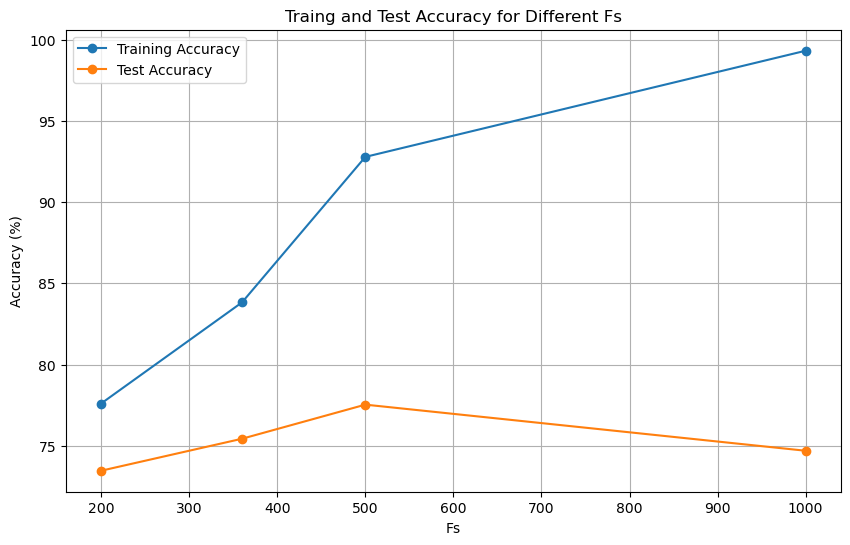

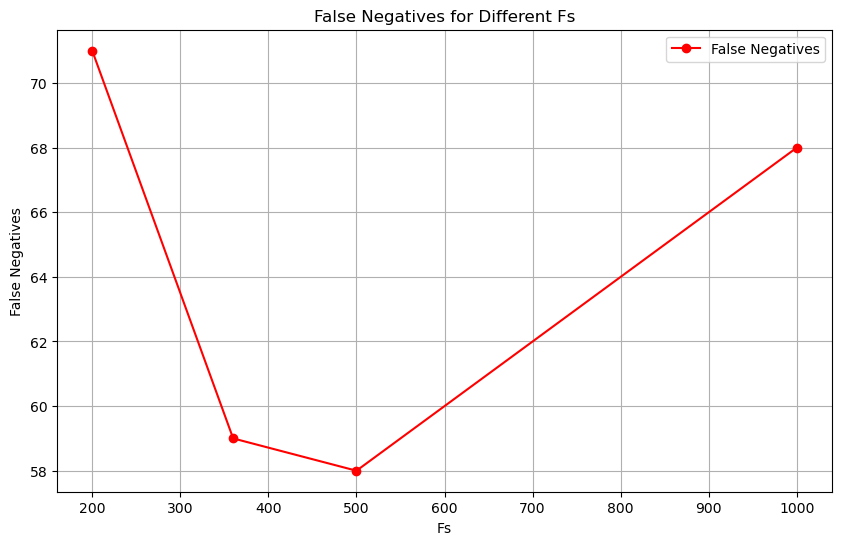

In [102]:
# Plot 1: Test Accuracy and Train Accuracy for different values of Fs
plt.figure(figsize=(10, 6))
plt.plot(Fs_vector, accuracy_list_train, label="Training Accuracy", marker='o')
plt.plot(Fs_vector, accuracy_list_test, label="Test Accuracy", marker='o')
plt.xlabel('Fs')
plt.ylabel('Accuracy (%)')
plt.title('Traing and Test Accuracy for Different Fs')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: False Negatives for different values of H
plt.figure(figsize=(10, 6))
plt.plot(Fs_vector, false_negatives, label="False Negatives", marker='o', color='r')
plt.xlabel('Fs')
plt.ylabel('False Negatives')
plt.title('False Negatives for Different Fs')
plt.legend()
plt.grid(True)
plt.show()

Testing configuration: N=8, H=4, Fs=200
Testing configuration: N=8, H=4, Fs=360
Testing configuration: N=8, H=4, Fs=500
Testing configuration: N=8, H=4, Fs=1000
Testing configuration: N=8, H=8, Fs=200
Testing configuration: N=8, H=8, Fs=360
Testing configuration: N=8, H=8, Fs=500
Testing configuration: N=8, H=8, Fs=1000
Testing configuration: N=8, H=16, Fs=200
Testing configuration: N=8, H=16, Fs=360
Testing configuration: N=8, H=16, Fs=500
Testing configuration: N=8, H=16, Fs=1000
Testing configuration: N=8, H=32, Fs=200
Testing configuration: N=8, H=32, Fs=360
Testing configuration: N=8, H=32, Fs=500
Testing configuration: N=8, H=32, Fs=1000
Testing configuration: N=8, H=64, Fs=200
Testing configuration: N=8, H=64, Fs=360
Testing configuration: N=8, H=64, Fs=500
Testing configuration: N=8, H=64, Fs=1000
Testing configuration: N=8, H=128, Fs=200
Testing configuration: N=8, H=128, Fs=360
Testing configuration: N=8, H=128, Fs=500
Testing configuration: N=8, H=128, Fs=1000
Testing config

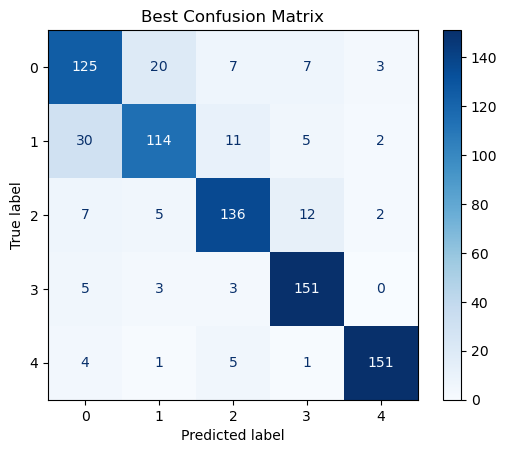

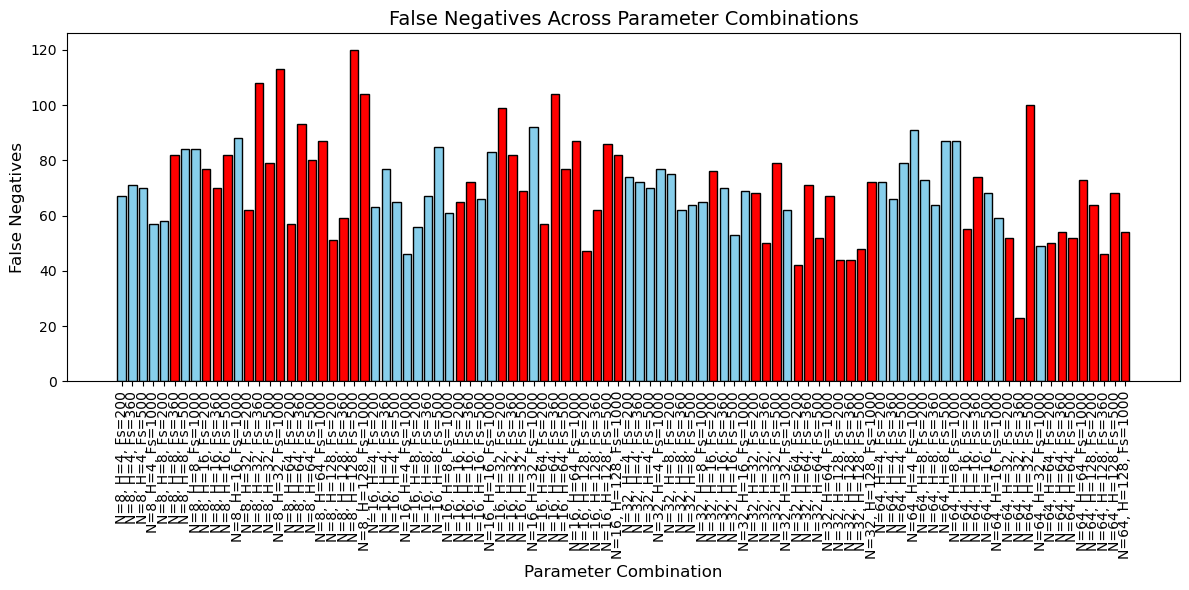

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

# Variables to store the results
results = []

# Loop through the parameters
for N in N_vector:
  for H in H_vector:
    for Fs in Fs_vector:
      print(f"Testing configuration: N={N}, H={H}, Fs={Fs}")

      # Resampling the signals of the training set
      train_resampled = [
          librosa.resample(x, orig_sr=360, target_sr=Fs) for x in train_set
      ]

      # Resampling the signals of the test set
      test_resampled = [
          librosa.resample(x, orig_sr=360, target_sr=Fs) for x in test_set
      ]

      # Calculate the feature vector for the training set
      train_fvector = [compute_feature_vector(x, Fs, N=N, H=H) for x in train_resampled]

      # Calculate the feature vector for the test set
      test_fvector = [compute_feature_vector(x, Fs, N=N, H=H) for x in test_resampled]

      # Train the model
      model = sklearn.svm.SVC(C=10, kernel='rbf')
      model.fit(train_fvector, labels_train)

      # Predictions on the test set
      test_predictions = model.predict(test_fvector)

      # Calculate the confusion matrix
      conf_matrix = confusion_matrix(labels_test, test_predictions)

      # Calculate false negatives (first column minus first row)
      false_negatives = np.sum(conf_matrix[1:, 0])

      # Calculate accuracy
      test_accuracy = accuracy_score(labels_test, test_predictions) * 100

      # Save the results
      results.append({
          'N': N,
          'H': H,
          'Fs': Fs,
          'False Negatives': false_negatives,
          'Test Accuracy': test_accuracy,
          'Confusion Matrix': conf_matrix
      })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Criteria for identifying the best configuration
accuracy_threshold = 70  # Define a minimum accuracy threshold
filtered_results = results_df[results_df['Test Accuracy'] >= accuracy_threshold]
best_result = filtered_results.loc[filtered_results['False Negatives'].idxmin()]
best_conf_matrix = best_result['Confusion Matrix']

# Plot of the best confusion matrix
print("\nBest Configuration:")
print(f"N={best_result['N']}, H={best_result['H']}, Fs={best_result['Fs']}")
print(f"False Negatives: {best_result['False Negatives']}, Test Accuracy: {best_result['Test Accuracy']:.2f}%")

# Display the confusion matrix
ConfusionMatrixDisplay(best_conf_matrix).plot(cmap="Blues")
plt.title("Best Confusion Matrix")
plt.show()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_positions = range(len(results_df))
bar_labels = [f"N={row['N']}, H={row['H']}, Fs={row['Fs']}" for _, row in results_df.iterrows()]

# If the accuracy is under the accuracy threshold then colour the bar red
colors = ['skyblue' if acc >= accuracy_threshold else 'red' for acc in results_df['Test Accuracy']]
ax.bar(bar_positions, results_df['False Negatives'], color=colors, edgecolor='black')
ax.set_xlabel("Parameter Combination", fontsize=12)
ax.set_ylabel("False Negatives", fontsize=12)
ax.set_title("False Negatives Across Parameter Combinations", fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels, rotation=90, fontsize=10)
plt.tight_layout()
plt.show()
